# Load packages and set work dir

In [1]:
def date(string):
    string2 = str(string)
    if len(string2)<6:
        a= 0
    else:
        a= 1
    return a    

def split(string):
    try:
        date_time_str = string.split(" ")[0]
    except:
        date_time_str = ''
    return date_time_str 

def naTyear(string):
    if type(string) == pd._libs.tslibs.nattype.NaTType:
        a = 0
    else:
        a = 1
    return a

def year(date):
    month = date.month
    day = date.day
    
    if (month == 1)&(day == 1):
        year = date.year
    else:
        year = date
    return year

def get_year(date):
    year = date.year
    
    return year


def tojulian(string):
    try:
        dt = string.split('/')
        dt2 = datetime(int(dt[2]), int(dt[0]), int(dt[1]))
        ju_dt = dt2.strftime('%j')
        return(ju_dt)
    except:
        return None
    
def tojulian(string):
    
    try:
        if len(string)>4:
            try:
                dt = string.split('/')
                dt2 = datetime(int(dt[2]), int(dt[0]), int(dt[1]))
                ju_dt = dt2.strftime('%j')
                return(ju_dt)

            except:
                return string
        else:
            return string
    except:
        return string
    
def str2nb(str0):
    
    try:
        str0b = str0[1:-1]
        nb = float(str0b)
    except:
        nb = str0
        
    return nb

In [2]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
import pyxlsb
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from kneed import KneeLocator
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\s1052014\\OneDrive - Syngenta\\Desktop\\NA_corn_WO\\Data2021\\Drought Stress'

# Read aggregated varibles by stages

## Derive yield gap for NA corn All

In [8]:
os.chdir('C:\\Users\\s1052014\\OneDrive - Syngenta\\Desktop\\NA_corn_WO\\Data2021\\Drought Stress\\corn dataset')

In [5]:
yd = pd.read_csv('ygsmn_2021.csv')
yd['trial_id'].nunique()

dta = pd.read_csv('NA_corn_var_3stages.csv')
dta2 = pd.merge(dta, yd[['trial_id','ygsmn']], on=['trial_id'])

In [ ]:
dta3 = dta2.groupby(['trial_id', 'wsy_c', 'year', 'Water_deficit_VEVT', 'Water_deficit_VTR4',
       'Water_deficit_R4Harvest', 'Heat_VEVT', 'Heat_VTR4', 'Heat_R4Harvest',
       'VPD_VEVT', 'VPD_VTR4', 'VPD_R4Harvest', 'VPD_max_VEVT', 'VPD_max_VTR4',
       'VPD_max_R4Harvest', 'et_VEVT', 'et_VTR4', 'et_R4Harvest', 'Max_T_VEVT',
       'Max_T_VTR4', 'Max_T_R4Harvest', 'Avg_T_VEVT', 'Avg_T_VTR4',
       'Avg_T_R4Harvest', 'HPR_VEVT', 'HPR_VTR4', 'HPR_R4Harvest', 'P_VEVT',
       'P_VTR4', 'P_R4Harvest', 'RH_VEVT', 'RH_VTR4', 'RH_R4Harvest',
       'yield_potential','market_segment']).agg('mean')
dta3 = dta3.reset_index()
dta3.shape

In [ ]:
dta3['yield_gap'] = dta3['yield_potential'] - dta3['ygsmn']*0.1
dta3['Percent_yield_gap'] = dta3['yield_gap']*100/dta3['yield_potential']
print(dta3.head(3))
dta3['Percent_yield_gap'].hist()
dta4 = dta3.loc[dta3.yield_gap>=0]
print(dta3.shape)
dta4.shape

In [5]:
print(dta4[['ygsmn','wsy_c']].groupby(['wsy_c']).describe())
plt.figure(figsize=(15,8))
sns.histplot(x='ygsmn', data=dta4, hue='wsy_c')
plt.show()

NameError: name 'dta4' is not defined

In [175]:
print(dta4['wsy_c'].value_counts())
dta5 = dta4.loc[dta4.wsy_c!='ECO']
dta5['wsy_c'].loc[dta5.wsy_c!='IRR'] = 'LIRR'
print(dta5['wsy_c'].value_counts())

DRY     143189
IRR      35295
NONE     22405
RAIN     12517
TILE      8536
LIRR      3054
ECO         77
Name: wsy_c, dtype: int64
LIRR    189701
IRR      35295
Name: wsy_c, dtype: int64


          ygsmn                                                            \
          count        mean        std        min         25%         50%   
wsy_c                                                                       
IRR     35295.0  134.037745  17.857149  36.698043  122.700942  135.650870   
LIRR   189701.0  117.143872  18.663178  16.671958  106.463784  118.253333   

                               
              75%         max  
wsy_c                          
IRR    146.481755  186.511667  
LIRR   129.635000  178.512059  


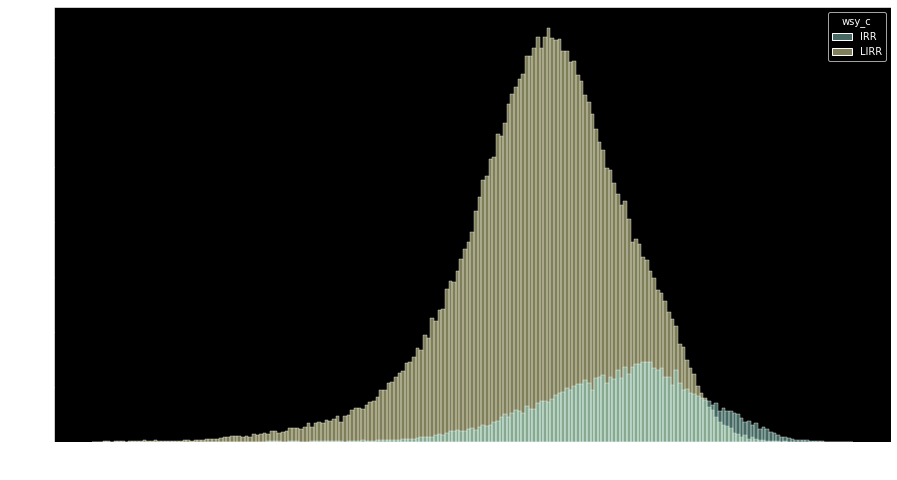

In [205]:
print(dta5[['ygsmn','wsy_c']].groupby(['wsy_c']).describe())
plt.figure(figsize=(15,8))
sns.histplot(x='ygsmn', data=dta5, hue='wsy_c')
plt.show()

In [176]:
dta5.to_csv('NA_var_3stages.csv', index=False)

## Data process 

### West market segment

In [602]:
#dt = pd.read_csv('Selected_var_stage3.csv')
os.chdir('C:\\Users\\s1052014\\OneDrive - Syngenta\\Desktop\\NA_corn_WO\\Data2021\\Drought Stress\\corn dataset')

#dt = pd.read_csv('NA_var_3stages.csv')
dt= pd.read_csv('Environment_7stages_NA_corn.csv')
dt = dt.loc[dt.year>2015]
dt = dt.loc[dt.Market_segment=='West']
#dt = dt.loc[dt.year>2015]
print(dt.shape)

dt = dt[['trial_id','ygsmn','year','yield_gap',
       'Percent_yield_gap','WaterDeficitVE.V6', 'WaterDeficitV6.VT', 'WaterDeficitVT.R2',
       'WaterDeficitR2.R4', 'WaterDeficitR4.R6', 'WaterDeficitR6.Harvest',
      'HeatVE.V6', 'HeatV6.VT',
       'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6', 'HeatR6.Harvest',
       'VaporPressureDeficitVE.V6', 'VaporPressureDeficitV6.VT',
       'VaporPressureDeficitVT.R2', 'VaporPressureDeficitR2.R4',
       'VaporPressureDeficitR4.R6', 'VaporPressureDeficitR6.Harvest',
       'et0sumVE.V6','et0sumV6.VT', 'et0sumVT.R2', 'et0sumR2.R4', 'et0sumR4.R6',
       'et0sumR6.Harvest','rhavgVE.V6', 'rhavgV6.VT', 'rhavgVT.R2', 'rhavgR2.R4', 'rhavgR4.R6',
       'rhavgR6.Harvest', 'HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4','HPRR4.R6',
       'HPRR6.Harvest','tempavgVE.V6',
       'tempavgV6.VT', 'tempavgVT.R2', 'tempavgR2.R4', 'tempavgR4.R6',
       'tempavgR6.Harvest','precsumVE.V6',
       'precsumV6.VT', 'precsumVT.R2', 'precsumR2.R4', 'precsumR4.R6',
       'precsumR6.Harvest','wsy_c']]
dt2 = dt.drop(['trial_id', 'ygsmn', 'yield_gap',
       'Percent_yield_gap'],axis=1).drop_duplicates()
dt3 = dt.groupby(dt2.columns.to_list()).agg('mean')
dt3 = dt3.reset_index()


irr, lirr = dt3.loc[dt3.wsy_c=='IRR'], dt3.loc[dt3.wsy_c!='IRR']


(29170, 104)


In [603]:
print(dt2.shape)
print(dt3.shape)
print(lirr.shape)
print(irr.shape)
dt3.columns

(6248, 50)
(6248, 53)
(4300, 53)
(1948, 53)


Index(['year', 'WaterDeficitVE.V6', 'WaterDeficitV6.VT', 'WaterDeficitVT.R2',
       'WaterDeficitR2.R4', 'WaterDeficitR4.R6', 'WaterDeficitR6.Harvest',
       'HeatVE.V6', 'HeatV6.VT', 'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6',
       'HeatR6.Harvest', 'VaporPressureDeficitVE.V6',
       'VaporPressureDeficitV6.VT', 'VaporPressureDeficitVT.R2',
       'VaporPressureDeficitR2.R4', 'VaporPressureDeficitR4.R6',
       'VaporPressureDeficitR6.Harvest', 'et0sumVE.V6', 'et0sumV6.VT',
       'et0sumVT.R2', 'et0sumR2.R4', 'et0sumR4.R6', 'et0sumR6.Harvest',
       'rhavgVE.V6', 'rhavgV6.VT', 'rhavgVT.R2', 'rhavgR2.R4', 'rhavgR4.R6',
       'rhavgR6.Harvest', 'HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4',
       'HPRR4.R6', 'HPRR6.Harvest', 'tempavgVE.V6', 'tempavgV6.VT',
       'tempavgVT.R2', 'tempavgR2.R4', 'tempavgR4.R6', 'tempavgR6.Harvest',
       'precsumVE.V6', 'precsumV6.VT', 'precsumVT.R2', 'precsumR2.R4',
       'precsumR4.R6', 'precsumR6.Harvest', 'wsy_c', 'ygsmn', 'yield_gap',
       

In [604]:
irr2, lirr2 = irr.drop(['ygsmn','Percent_yield_gap','year','wsy_c'], axis=1),  lirr.drop(['ygsmn','Percent_yield_gap','year','wsy_c'], axis=1)
lirr_x, lirr_y = lirr2.drop(['yield_gap'], axis=1), lirr2[['yield_gap']]
irr_x, irr_y = irr2.drop(['yield_gap'], axis=1), irr2[['yield_gap']]

In [592]:
# irr2, lirr2 = irr.drop(['ygsmn','Percent_yield_gap','year','yield_potential','wsy_c'], axis=1),  lirr.drop(['ygsmn','Percent_yield_gap','year','yield_potential','wsy_c'], axis=1)
# lirr_x, lirr_y = lirr2.drop(['yield_gap','Avg_T_VEVT', 'Avg_T_VTR4', 
#                'Avg_T_R4Harvest','P_VEVT', 'P_VTR4','P_R4Harvest','Max_T_VEVT', 'Max_T_VTR4', 'Max_T_R4Harvest'], axis=1), lirr2[['yield_gap']]
# irr_x, irr_y = irr2.drop(['yield_gap','Avg_T_VEVT', 'Avg_T_VTR4', 
#                'Avg_T_R4Harvest','VPD_max_VEVT', 'VPD_max_VTR4', 'VPD_max_R4Harvest','P_VEVT', 'P_VTR4','P_R4Harvest'], axis=1), irr2[['yield_gap']]

In [605]:
lirr_x.columns

Index(['WaterDeficitVE.V6', 'WaterDeficitV6.VT', 'WaterDeficitVT.R2',
       'WaterDeficitR2.R4', 'WaterDeficitR4.R6', 'WaterDeficitR6.Harvest',
       'HeatVE.V6', 'HeatV6.VT', 'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6',
       'HeatR6.Harvest', 'VaporPressureDeficitVE.V6',
       'VaporPressureDeficitV6.VT', 'VaporPressureDeficitVT.R2',
       'VaporPressureDeficitR2.R4', 'VaporPressureDeficitR4.R6',
       'VaporPressureDeficitR6.Harvest', 'et0sumVE.V6', 'et0sumV6.VT',
       'et0sumVT.R2', 'et0sumR2.R4', 'et0sumR4.R6', 'et0sumR6.Harvest',
       'rhavgVE.V6', 'rhavgV6.VT', 'rhavgVT.R2', 'rhavgR2.R4', 'rhavgR4.R6',
       'rhavgR6.Harvest', 'HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4',
       'HPRR4.R6', 'HPRR6.Harvest', 'tempavgVE.V6', 'tempavgV6.VT',
       'tempavgVT.R2', 'tempavgR2.R4', 'tempavgR4.R6', 'tempavgR6.Harvest',
       'precsumVE.V6', 'precsumV6.VT', 'precsumVT.R2', 'precsumR2.R4',
       'precsumR4.R6', 'precsumR6.Harvest'],
      dtype='object')

## Standardize variables 

In [638]:
lirr_x = irr_x.copy()
lirr_y = irr_y.copy()
lirr_x2 = StandardScaler().fit_transform(lirr_x)
lirr_x2= pd.DataFrame(lirr_x2, columns=lirr_x.columns)
lirr_x = lirr_x2.copy()
lirr_x.head(2)


# irr_x2 = StandardScaler().fit_transform(irr_x)
# irr_x2= pd.DataFrame(irr_x2, columns=irr_x.columns)
# irr_x = irr_x2.copy()
# irr_x.head(2)

,WaterDeficitVE.V6,WaterDeficitV6.VT,WaterDeficitVT.R2,WaterDeficitR2.R4,WaterDeficitR4.R6,WaterDeficitR6.Harvest,HeatVE.V6,HeatV6.VT,HeatVT.R2,HeatR2.R4,...,tempavgVT.R2,tempavgR2.R4,tempavgR4.R6,tempavgR6.Harvest,precsumVE.V6,precsumV6.VT,precsumVT.R2,precsumR2.R4,precsumR4.R6,precsumR6.Harvest
0,-3.765026,-2.692247,-0.134955,0.004907,0.821546,-1.103761,-5.848612,-7.785001,0.195859,0.20274,...,-0.206734,-0.407756,-1.286516,0.090294,-1.475068,-1.933109,-0.909452,-0.824431,-0.229845,-0.947266
1,-3.765026,-2.692247,-0.134955,0.004907,0.923207,-0.944405,-5.848612,-7.785001,0.195859,0.20274,...,-0.206734,-0.385602,-1.227652,0.133252,-1.475068,-1.933109,-0.909452,-0.905616,-0.196027,-0.947266


In [639]:
print(irr_x.shape)
print(lirr_x.shape)

(1948, 48)
(1948, 48)


# Factor analysis and factor importance

## Conduct factor analysis

In [608]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

In [609]:
lirr_x.shape

(4300, 48)

In [640]:
feas_sds = lirr_x
feas_sds.columns

fa = FactorAnalyzer(n_factors=30, rotation="varimax", method="principal",  is_corr_matrix=False)
fa.fit(feas_sds)
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

fact = fa.transform(feas_sds)
fact.shape

                        0         1         2         3         4         5   \
Variance          8.526734  3.619155  3.253731  3.139630  3.102275  2.454356   
Proportional Var  0.177640  0.075399  0.067786  0.065409  0.064631  0.051132   
Cumulative Var    0.177640  0.253039  0.320825  0.386234  0.450865  0.501998   

                        6         7         8         9   ...        20  \
Variance          2.096757  1.724831  1.640874  1.380920  ...  0.997392   
Proportional Var  0.043682  0.035934  0.034185  0.028769  ...  0.020779   
Cumulative Var    0.545680  0.581614  0.615799  0.644568  ...  0.896546   

                        21        22        23        24        25        26  \
Variance          0.935950  0.560074  0.470839  0.452245  0.320594  0.310170   
Proportional Var  0.019499  0.011668  0.009809  0.009422  0.006679  0.006462   
Cumulative Var    0.916045  0.927713  0.937522  0.946944  0.953623  0.960085   

                        27        28        29  
Variance

(1948, 30)

## Check factor correlation with yield

In [641]:
nms= []
for i in range(1,31):
    nm = 'factor' + str(i)
    nms.append(nm)

In [642]:
fac = pd.DataFrame(data=fact)
fac.columns= nms
fac2 = fac.copy()
fac2[['ygsmn']] = lirr[['ygsmn']]
fac2[['yield_gap']] = lirr[['yield_gap']]
fac2.corr().round(2)

,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,...,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,ygsmn,yield_gap
factor1,1.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,...,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.03,0.01
factor2,-0.00,1.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.10,0.13
factor3,0.00,0.00,1.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.12,-0.08
factor4,0.00,0.00,-0.00,1.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,...,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.05,-0.00
factor5,-0.00,-0.00,0.00,0.00,1.00,0.00,0.00,-0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.06,0.01
factor6,0.00,0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.04,0.04
factor7,0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,-0.00,-0.00,-0.00,...,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.03,0.06
factor8,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.06,-0.02
factor9,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,...,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.07,0.03
factor10,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,1.00,...,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.02,0.08


## Check factor loadings

In [643]:
pd.set_option('display.max_rows', None)
lds = fa.loadings_
lds2 = pd.DataFrame(lds)
lds2.shape
lds2.index = feas_sds.columns
lds2.columns = fac.columns
lds2 = lds2.round(2)
lds2

,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,...,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30
WaterDeficitVE.V6,0.39,0.40,0.11,-0.01,0.31,0.07,-0.08,0.02,0.01,0.03,...,0.12,0.02,0.62,0.05,0.01,0.01,0.02,0.02,-0.01,0.01
WaterDeficitV6.VT,0.87,0.14,-0.11,-0.06,-0.06,-0.07,0.06,0.10,0.05,-0.03,...,0.07,0.01,0.02,-0.05,0.05,-0.11,0.08,-0.05,0.04,0.25
WaterDeficitVT.R2,0.15,-0.11,-0.08,-0.06,-0.06,-0.01,0.15,-0.09,-0.08,0.31,...,-0.00,-0.00,-0.01,-0.00,-0.03,0.00,-0.01,-0.00,-0.01,-0.00
WaterDeficitR2.R4,0.06,0.02,-0.01,-0.01,0.19,-0.06,0.05,0.97,-0.02,0.01,...,-0.01,0.04,0.00,0.00,-0.03,-0.01,-0.01,0.00,0.00,0.01
WaterDeficitR4.R6,0.38,0.16,0.35,0.03,0.08,-0.01,-0.02,0.18,0.69,-0.09,...,-0.07,0.04,-0.01,-0.13,0.15,0.04,0.00,-0.06,-0.04,0.03
WaterDeficitR6.Harvest,0.10,0.11,0.89,0.02,0.06,-0.02,-0.06,0.04,0.18,-0.05,...,0.03,-0.01,0.05,-0.02,0.00,-0.04,-0.17,-0.09,0.00,0.01
HeatVE.V6,0.18,0.22,0.03,-0.01,0.07,0.02,-0.00,0.01,0.00,0.01,...,0.11,-0.01,0.08,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
HeatV6.VT,0.43,0.25,0.09,-0.00,0.17,-0.07,0.06,-0.03,-0.05,0.03,...,0.69,0.00,0.12,0.03,0.00,-0.00,-0.02,0.01,0.07,-0.01
HeatVT.R2,0.06,-0.01,-0.09,0.03,0.26,-0.23,0.89,0.08,0.02,0.05,...,0.01,0.02,-0.02,0.05,0.01,-0.06,0.08,-0.01,-0.01,0.02
HeatR2.R4,0.02,0.00,0.03,0.70,0.40,-0.09,0.15,0.03,0.02,0.01,...,-0.01,0.34,0.04,0.11,-0.03,0.04,-0.03,0.03,0.02,0.37


## Get factor importance from random forest

In [644]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(fac, lirr_y)

feature_list = list(fac.columns)
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

feature_list, importances= zip(*feature_importances)
feas = list(feature_list)
feas

['factor1',
 'factor12',
 'factor14',
 'factor5',
 'factor17',
 'factor2',
 'factor11',
 'factor16',
 'factor6',
 'factor15',
 'factor18',
 'factor4',
 'factor20',
 'factor23',
 'factor26',
 'factor29',
 'factor3',
 'factor7',
 'factor8',
 'factor9',
 'factor10',
 'factor13',
 'factor19',
 'factor21',
 'factor22',
 'factor24',
 'factor25',
 'factor27',
 'factor28',
 'factor30']

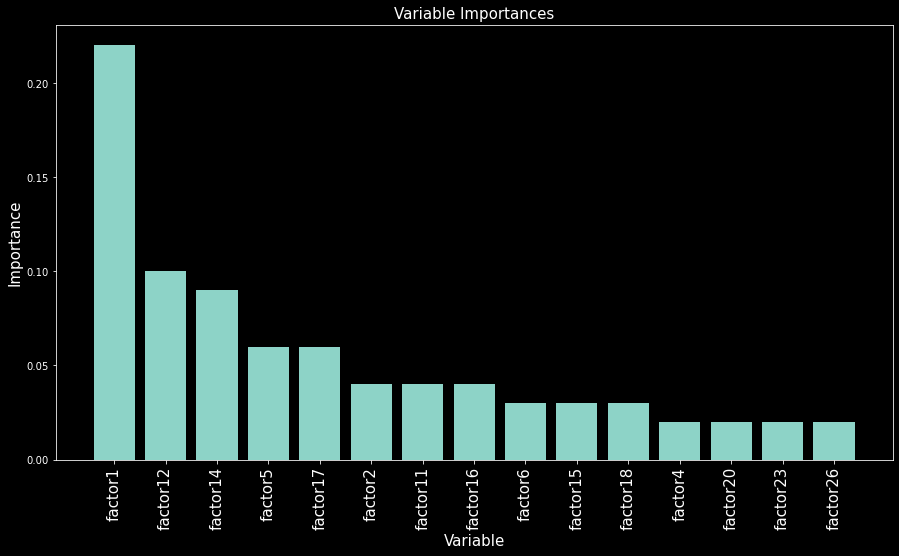

In [645]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
# list of x locations for plotting
x_values = list(range(15))
# Make a bar chart
plt.bar(x_values, importances[:15], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list[:15], rotation='vertical',size=15)
# Axis labels and title
plt.ylabel('Importance', size=15); plt.xlabel('Variable',size=15); plt.title('Variable Importances',size=15);

 # Determine predictability of factors on yield and choose the number of factors with Random Forest

## Choose number of factors 

In [646]:
r2A = []
for f in range(10,25):
    feas2 = feas[:f]
    
    r2s = []
    for i in range(30):
        fea_tr, fea_ts, y_tr, y_ts = train_test_split(fac[feas2], lirr_y, test_size=0.25)
        rf = RandomForestRegressor(n_estimators=56, n_jobs=6)
        model = rf.fit(fea_tr, y_tr)

        fea_pred = model.predict(fea_ts)
        fea_pred = fea_pred.ravel()
        r2= sklearn.metrics.r2_score(y_ts, fea_pred)
        r2s.append(r2)
        
    mn = pd.DataFrame(r2s).median()    
    r2A.append(mn)    
    print(f)
    print(mn)

10
0    0.795757
dtype: float64
11
0    0.794175
dtype: float64
12
0    0.801959
dtype: float64
13
0    0.809053
dtype: float64
14
0    0.804691
dtype: float64
15
0    0.801696
dtype: float64
16
0    0.794233
dtype: float64
17
0    0.797936
dtype: float64
18
0    0.798686
dtype: float64
19
0    0.793356
dtype: float64
20
0    0.807726
dtype: float64
21
0    0.791815
dtype: float64
22
0    0.800248
dtype: float64
23
0    0.798508
dtype: float64
24
0    0.804715
dtype: float64


In [649]:
r2A = pd.DataFrame(r2A)
r2A= r2A.round(2)

a = r2A[0].argmax()
a2 = a+10
print(a2)

13


In [650]:
feas2 =  feas[:a2]
feas2 = list(feas2)
feas2

['factor1',
 'factor12',
 'factor14',
 'factor5',
 'factor17',
 'factor2',
 'factor11',
 'factor16',
 'factor6',
 'factor15',
 'factor18',
 'factor4',
 'factor20']

## Determine factor weights

In [651]:
rf = RandomForestRegressor(n_estimators=200, n_jobs=6)
rf.fit(fac[feas2], lirr_y)
#feature_list = list(lirr_x.columns)
feature_list = feas2
importances = list(rf.feature_importances_)
importances

[0.23874338646883897,
 0.11696969805442903,
 0.10758186070758383,
 0.07749516399668242,
 0.06826151748360336,
 0.05462609844524315,
 0.05590904494785701,
 0.052743647128821985,
 0.051895074171115434,
 0.04934357287387378,
 0.05135066705511375,
 0.03799163958200816,
 0.0370886290848292]

In [652]:
vars_sel = pd.DataFrame(feature_list)
vars_sel['coeff'] = pd.DataFrame(importances)
vars_sel

,0,coeff
0,factor1,0.238743
1,factor12,0.116970
2,factor14,0.107582
3,factor5,0.077495
4,factor17,0.068262
5,factor2,0.054626
6,factor11,0.055909
7,factor16,0.052744
8,factor6,0.051895
9,factor15,0.049344


# Stress characterization 

## Clustering

### LIRR 

In [653]:
vars_sel.rename(columns={0:'Variable', 'coeff':'Coefficient'}, inplace=True)
vars_sel.sort_values(['Coefficient'], ascending=False)

,Variable,Coefficient
0,factor1,0.238743
1,factor12,0.116970
2,factor14,0.107582
3,factor5,0.077495
4,factor17,0.068262
6,factor11,0.055909
5,factor2,0.054626
7,factor16,0.052744
8,factor6,0.051895
10,factor18,0.051351


In [654]:
lirr_feas = fac[feas2].copy()
feas_sd = lirr_feas
print(feas_sd.shape)

(1948, 13)


In [655]:
ns = feas_sd.shape[1]
for i in range(ns):
    feas_sd.iloc[:,i] = feas_sd.iloc[:,i]*vars_sel['Coefficient'][i]
    
feas_sd.head(2)

,factor1,factor12,factor14,factor5,factor17,factor2,factor11,factor16,factor6,factor15,factor18,factor4,factor20
0,-0.613839,0.059645,-0.093662,-0.082198,-0.090195,-0.050027,-0.256367,0.060952,-0.012533,-0.030876,0.008536,0.000435,-0.001096
1,-0.626050,0.033477,-0.108428,-0.050729,-0.084337,-0.050633,-0.257187,0.061204,-0.006989,-0.029301,0.009394,0.000762,-0.001951


### Clustering with 100 reps

In [656]:
clusters_df = pd.DataFrame()
sses_df = pd.DataFrame()
sse_ls= []
for rp in range(50):
    
    kmns = KMeans(n_clusters=15, n_init=10, max_iter=500, init='k-means++')
    kmns.fit(feas_sd)
    
    lb = kmns.labels_
    lb_df = pd.DataFrame(lb)
    clusters_df = pd.concat([clusters_df, lb_df], axis=1)
    
    sses = kmns.inertia_
    sse_ls.append(sses)

In [657]:
sse_df = pd.DataFrame(sse_ls)
print(sse_df[0].min())
print(sse_df[0].argmin(axis=0))
sse_df.describe()

ind = sse_df[0].argmin(axis=0)

65.93996342536636
18


In [658]:
dfs = irr.copy()

#dfs = lirr.copy()
dfs.index = clusters_df.index
dfs['Cluster'] =  clusters_df.iloc[:,ind]
#dfs['Cluster'] =  y_pred
#print(dfs['Cluster'].value_counts())
cluster_md = dfs[['Cluster', 'ygsmn','Percent_yield_gap']].groupby(['Cluster']).quantile(0.5)
cluster_md.head(2)

cluster_md = cluster_md.reset_index()
cluster_md['Stress'] = 'Medium'
cluster_md['Stress'].loc[cluster_md.Percent_yield_gap>=49.5] = 'High'
cluster_md['Stress'].loc[cluster_md.Percent_yield_gap<29.5] = 'Low'
cluster_md

,Cluster,ygsmn,Percent_yield_gap,Stress
0,0,138.459825,29.388514,Low
1,1,131.181686,34.289067,Medium
2,2,139.727491,29.311555,Low
3,3,131.048348,31.489499,Medium
4,4,122.876304,37.483654,Medium
5,5,133.352721,28.833619,Low
6,6,140.533091,22.031254,Low
7,7,85.574084,57.780973,High
8,8,145.190671,22.778003,Low
9,9,92.389646,50.329264,High


In [659]:
try:
    dfs = dfs.drop(['Stress_class'], axis=1)
except:
    dfs= dfs
    
dt_plot2 = pd.merge(dfs, cluster_md[['Cluster','Stress']], on='Cluster')

dt_plot2['Stress'].value_counts()

Low       1461
Medium     475
High        12
Name: Stress, dtype: int64

In [660]:
irr_re = dt_plot2.copy()

In [637]:
lirr_re = dt_plot2.copy()

In [661]:
dt_a = pd.concat([lirr_re, irr_re], axis=0)
dt_a.shape

(6248, 55)

In [539]:
dt_a = dt_plot2.copy()
dt_a.columns

Index(['wsy_c', 'year', 'Water_deficit_VEVT', 'Water_deficit_VTR4',
       'Water_deficit_R4Harvest', 'Heat_VEVT', 'Heat_VTR4', 'Heat_R4Harvest',
       'VPD_VEVT', 'VPD_VTR4', 'VPD_R4Harvest', 'VPD_max_VEVT', 'VPD_max_VTR4',
       'VPD_max_R4Harvest', 'et_VEVT', 'et_VTR4', 'et_R4Harvest', 'Max_T_VEVT',
       'Max_T_VTR4', 'Max_T_R4Harvest', 'Avg_T_VEVT', 'Avg_T_VTR4',
       'Avg_T_R4Harvest', 'HPR_VEVT', 'HPR_VTR4', 'HPR_R4Harvest', 'P_VEVT',
       'P_VTR4', 'P_R4Harvest', 'RH_VEVT', 'RH_VTR4', 'RH_R4Harvest',
       'yield_potential', 'ygsmn', 'yield_gap', 'Percent_yield_gap', 'Cluster',
       'Stress'],
      dtype='object')

In [331]:
dt_a['wsy_c']='LIRR'
dt_a['wsy_c'].loc[dt_a.wsy_c_IRR==1] = 'IRR'

In [662]:
dt_a2 = pd.merge(dt_a, dt, on=dt2.columns.to_list())
print(dt_a2.shape)

dt_a2.groupby(['Stress','wsy_c']).size()
dt_a2.groupby(['Stress']).size()

(29170, 59)


Stress
High        325
Low       23267
Medium     5578
dtype: int64

In [514]:
dt_a2.to_csv('DH_stress_west_More_var.csv', index=False)

In [509]:
dt0 = pd.read_csv('DH_stress_west_V3.csv')
#dt0 = dt0.loc[dt0.wsy_c=='LIRR']

dt0['Stress'].value_counts()

Medium    43213
Low       20805
High       1946
Name: Stress, dtype: int64

In [510]:
dt_a3 = pd.merge(dt_a2, dt0, on=['trial_id'], how='left')
print(dt_a3.shape)
print(dt_a2.shape)

dt_a3.groupby(['Stress_x','Stress_y']).size()

(34853, 46)
(34853, 44)


Stress_x  Stress_y
High      High          261
          Low            16
          Medium        171
Low       Low         13148
          Medium      10171
Medium    High           34
          Low          1675
          Medium       9377
dtype: int64

In [511]:
(261 +  13148 + 9377)/34853

0.653774424009411

In [230]:
dt_a3.rename(columns={'Stress_x':'stress_new', 'Stress_y':'stress_old'}, inplace=True)

In [259]:
dt_a3.to_csv('DH_stress_new_old.csv', index=False)

In [301]:
dt_a2[['trial_id','Stress','wsy_c']].to_csv('DH_stress_north2.csv', index=False)

In [220]:
dt_a2.groupby(['wsy_c','Stress']).size()

wsy_c  Stress
IRR    High         72
       Low       15201
       Medium    16070
LIRR   High       1269
       Low       12471
       Medium    20881
dtype: int64

In [233]:
w_old = pd.read_csv('DH_stress_NA_Corn_West_Market_Segment_Version2.csv')
#w_old = pd.read_csv('Deep_features_stress_characterization__NA_west_market.csv')
w_old.head(2)

,trial_id,year,Stress_class,wsy_c,DH_stress
0,09SUABYG6615C02,2009,Medium,LIRR,LIRR_Medium
1,09SUABYG6616312,2009,Medium,LIRR,LIRR_Medium


In [232]:
dt_a2 = pd.read_csv('DH_stress_west.csv')
dt_a2.head(2)

,trial_id,Stress,wsy_c
0,09SUABYG6818213,High,LIRR
1,09SURHYG4818213,High,LIRR


In [234]:
w2 = pd.merge(dt_a2[['trial_id','wsy_c','Stress']], w_old, on=['trial_id'])
w2.head(5)

,trial_id,wsy_c_x,Stress,year,Stress_class,wsy_c_y,DH_stress
0,09SUABYG6818213,LIRR,High,2009,High,LIRR,LIRR_High
1,09SURHYG4818213,LIRR,High,2009,High,LIRR,LIRR_High
2,09SUABYG6718213,LIRR,High,2009,High,LIRR,LIRR_High
3,09SURHYG4828213,LIRR,High,2009,High,LIRR,LIRR_High
4,09SURHYG4838213,LIRR,High,2009,High,LIRR,LIRR_High


In [235]:
w2.groupby(['Stress','Stress_class']).size()

Stress  Stress_class
High    High             1455
        Medium            491
Low     High                4
        Low             17037
        Medium           3764
Medium  High              557
        Low             12891
        Medium          29765
dtype: int64

In [236]:
(1455 + 17037 +  29765)/w2.shape[0]

0.7315657025043963

### Both heat and drought classes

In [125]:
irr_d= pd.read_csv('irr_results.csv')
lirr_4 = pd.merge(irr_d,dt_plot2[['trial_id','Stress_class']], on=['trial_id'])
print(lirr_4.shape)
lirr_4.head(2)

(31343, 5)


,trial_id,year,Stress_class_x,Water_managment,Stress_class_y
0,09SUABYG6615207,2009,Low,IRR,Low_stress
1,09SUABYG6616208,2009,Low,IRR,Low_stress


In [126]:
lirr_4.groupby(['Stress_class_x','Stress_class_y']).size()

Stress_class_x  Stress_class_y
High            Low_stress           36
                Medium_stress        56
Low             Low_stress        14110
                Medium_stress      3184
Medium          Low_stress         5965
                Medium_stress      7992
dtype: int64

In [122]:
(14110 + 7992)/31343

0.7051654276872029

In [127]:
dt_plot2.groupby(['Stress_class']).size()

Stress_class
Low_stress       20111
Medium_stress    11232
dtype: int64

In [128]:
irr_d.groupby(['Stress_class']).size()

Stress_class
High         92
Low       17294
Medium    13957
dtype: int64

### Histogram plot

In [904]:
dt_plot.columns

Index(['ygsmn', 'trial_id', 'year', 'Water_deficit_VEVT', 'Water_deficit_VTR4',
       'Water_deficit_R4Harvest', 'Heat_VEVT', 'Heat_VTR4', 'Heat_R4Harvest',
       'VPD_VEVT', 'VPD_VTR4', 'VPD_R4Harvest', 'VPD_max_VEVT', 'VPD_max_VTR4',
       'VPD_max_R4Harvest', 'et_VEVT', 'et_VTR4', 'et_R4Harvest', 'Max_T_VEVT',
       'Max_T_VTR4', 'Max_T_R4Harvest', 'Avg_T_VEVT', 'Avg_T_VTR4',
       'Avg_T_R4Harvest', 'HPR_VEVT', 'HPR_VTR4', 'HPR_R4Harvest', 'RH_VEVT',
       'RH_VTR4', 'RH_R4Harvest', 'P_VEVT', 'P_VTR4', 'P_R4Harvest',
       'yield_gap', 'Percent_yield_gap', 'Integrated factor', 'cluster2'],
      dtype='object')

In [905]:
lds2[feas2]

,factor2,factor9,factor13,factor6,factor5,factor11,factor12,factor1
Water_deficit_VEVT,0.19,-0.06,0.01,-0.04,0.00,0.04,0.02,0.71
Water_deficit_VTR4,0.36,0.12,0.01,-0.11,-0.07,0.24,0.02,0.08
Water_deficit_R4Harvest,0.16,0.06,-0.15,-0.19,-0.07,0.04,-0.09,0.15
Heat_VEVT,0.24,-0.06,-0.02,0.04,-0.03,-0.03,-0.11,0.35
Heat_VTR4,0.81,0.32,0.07,-0.18,-0.10,0.03,0.00,0.18
Heat_R4Harvest,0.06,0.01,-0.01,-0.04,-0.12,-0.01,0.01,-0.01
VPD_VEVT,0.25,0.04,-0.09,0.01,-0.09,0.05,0.03,0.89
VPD_VTR4,0.83,0.13,0.01,-0.10,-0.13,0.16,0.07,0.36
VPD_R4Harvest,0.35,0.12,0.10,-0.20,-0.52,0.06,0.05,0.36
et_VEVT,-0.28,-0.06,-0.33,0.12,0.10,0.01,0.09,-0.80


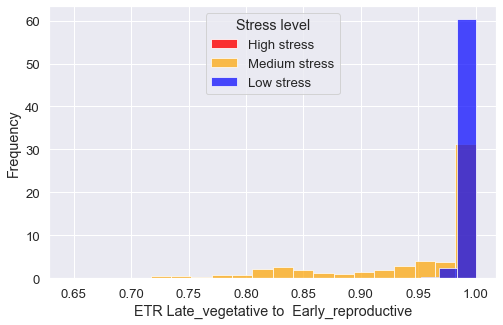

In [972]:
sns.set(font_scale=1.2)
dt = dt_plot2.copy()
plt.figure(figsize=(8,5))
var='Heat_VTR4'

plt.hist(dt[dt["Stress_class"]=='High_stress'][var].reset_index(drop=True),color='red', alpha=0.8, label="High stress", bins=20,density=True)
plt.hist(dt[dt["Stress_class"]=='Medium_stress'][var].reset_index(drop=True), alpha=0.7,color='orange', label="Medium stress", bins=20, density=True)
plt.hist(dt[dt["Stress_class"]=='Low_stress'][var].reset_index(drop=True), alpha=0.7, color='blue',label="Low stress", bins=20,density=True)

plt.xlabel('ETR Late_vegetative to  Early_reproductive')
plt.ylabel('Frequency')
#plt.xlim(5,300)
#plt.xlim(0.6, 1.0)
plt.legend(title='Stress level')
plt.show()

Text(0.5, 0, 'Stress group')

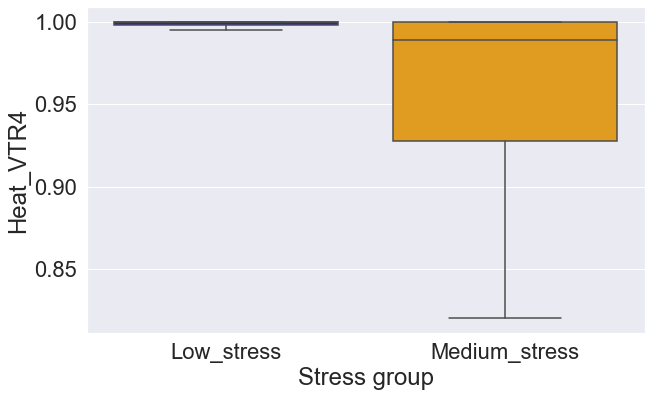

In [973]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
my_pal = {"High_stress": "red", "Medium_stress": "orange", "Low_stress":"blue"}
my_order = dt.groupby(by=["Stress_class"])[var].median().sort_values(ascending=False).index
sns.boxplot(x=dt['Stress_class'], y=dt[var], showfliers = False, palette=my_pal, order=my_order)
#sns.violinplot(x=dt['Stress_class'], y=dt['ygsmn'],showextrema=False, legend=False)
plt.legend([],[], frameon=False)
#plt.ylim(0,65)
#plt.ylabel('Relative humidity')
plt.xlabel('Stress group')

In [768]:
lirr2.to_csv('LIRR_stress_class.csv', index=False)

In [1524]:
#lirr = pd.read_csv('LIRR_stress_class.csv')

## Write results

In [129]:
lirr_d = dt_plot2[['trial_id','year','Stress_class']]
lirr_d['Water_managment'] = 'IRR'
lirr_d['Stress_class'].loc[lirr_d['Stress_class']=='Low_stress'] = 'Low'
lirr_d['Stress_class'].loc[lirr_d['Stress_class']=='Medium_stress'] = 'Medium'
lirr_d['Stress_class'].loc[lirr_d['Stress_class']=='High_stress'] = 'High'

In [130]:
lirr_d['Stress_class'].value_counts()

Low       20111
Medium    11232
Name: Stress_class, dtype: int64

In [131]:
lirr_d.to_csv('Stress_characterization_Corn_NA_Irr_V2.csv', index=False)

In [132]:
irr = pd.read_csv("Stress_characterization_Corn_NA_Irr_V2.csv")
lirr = pd.read_csv("Stress_characterization_Corn_NA_Lirr_V2.csv")
dta = pd.concat([irr,lirr],axis=0)
dta.shape

(65964, 4)

In [133]:
dta.to_csv('Stress_characterization_Corn_NA_V2.csv')

In [134]:
lirr2 = pd.read_csv("Stress_characterization_Corn_NA_Lirr_V2.csv")
lirr = pd.read_csv("Lirr_results.csv")

In [165]:
yd = pd.read_csv('ygsmn_2021.csv')
lirr_yd = pd.merge(lirr, yd, on=['trial_id'])
lirr_yd2 = pd.merge(lirr2, yd, on=['trial_id'])

ygsmn                                                       \
                 count        mean        std   min     25%     50%     75%   
Stress_class                                                                  
High           71465.0   77.581955  27.979367  3.12   58.52   78.36   96.27   
Low           550854.0  121.969561  20.840974 -1.27  108.69  121.90  135.37   
Medium        959672.0  109.272924  27.481053  0.00   93.28  111.87  127.95   

                      
                 max  
Stress_class          
High          201.77  
Low           290.27  
Medium        322.50

In [166]:
print(lirr_yd[['ygsmn','Stress_class']].groupby(['Stress_class']).describe())
print(lirr_yd2[['ygsmn','Stress_class']].groupby(['Stress_class']).describe())

                 ygsmn                                                       \
                 count        mean        std   min     25%     50%     75%   
Stress_class                                                                  
High          153008.0   77.484300  28.500100  0.40   57.24   76.67   95.69   
Low           459682.0  123.581405  20.793695 -1.27  110.12  123.54  137.08   
Medium        969301.0  112.384198  24.866979  0.00   97.87  114.03  128.82   

                      
                 max  
Stress_class          
High          201.77  
Low           219.52  
Medium        322.50  
                 ygsmn                                                       \
                 count        mean        std   min     25%     50%     75%   
Stress_class                                                                  
High           71465.0   77.581955  27.979367  3.12   58.52   78.36   96.27   
Low           550854.0  121.969561  20.840974 -1.27  108.69  121.90  13

In [137]:
lirra = pd.merge(lirr2, lirr, on='trial_id')
lirra.head(2)

,trial_id,year_x,Stress_class_x,Water_managment_x,year_y,Stress_class_y,Water_managment_y
0,09SUABYG6615C02,2009,Medium,LIRR,2009,Medium,LIRR
1,09SUABYG6616415,2009,Medium,LIRR,2009,Low,LIRR


In [138]:
lirra.groupby(['Stress_class_x','Stress_class_y']).size()

Stress_class_x  Stress_class_y
High            High               1270
                Medium               66
Low             High                 19
                Low                8741
                Medium             4847
Medium          High                885
                Low                2732
                Medium            16061
dtype: int64

In [139]:
(1270+  8741 +  16061)/lirr.shape[0]

0.7530689465931082

# Backup code: Summarize/Visualize Drought_Heat stress

In [169]:
lirr = pd.read_csv('Stress_characterization_results1.csv')
lirr.shape

(46703, 81)

In [175]:
lirr[['year','Heat_Drought Stress2','ygsmn']].groupby(['Heat_Drought Stress2','year']).agg(['mean','std','count'])

ygsmn                 
                                 mean        std count
Heat_Drought Stress2 year                             
H_H                  2010  172.685459  55.402803    56
                     2011  137.860780  25.461847    19
                     2012  145.532165  46.342234  1364
                     2013  113.469395  25.974397     5
                     2014  198.160263  44.700899     6
...                               ...        ...   ...
M_M                  2018  216.586715   7.554361   240
                     2020  171.974187  19.249118   179
V_V                  2012  107.303943  34.240556   304
                     2018   74.018845   4.499752    10
                     2020  178.723387  27.825216    44

[95 rows x 3 columns]

In [174]:
lirr[['year','Heat_stress2','ygsmn']].groupby(['Heat_stress2','year']).agg(['mean','std','count'])

ygsmn                 
                             mean        std count
Heat_stress2     year                             
High_stress      2010  158.726179  45.423514    97
                 2011  165.840389  28.540467   228
                 2012  142.716730  46.842010  1455
                 2013  122.213962  53.846679    42
                 2014  160.558532  53.848407    11
                 2015  130.529478  19.351708    12
                 2016   95.411114  39.176101    15
                 2017  144.718704  40.885769    35
                 2018  137.681632  41.617948    66
                 2019  138.563845  28.337017    65
                 2020  125.079512  46.363951    66
Low_stress       2009  209.469322  15.254845   245
                 2010  178.727597  20.861043  3943
                 2011  176.558878  18.838054  3520
                 2012  179.826972  28.828149  1410
                 2013  154.374914  38.268759  1401
                 2014  181.278401  30.786921   514
                 2015  183.812214  32.360336   976
                 2016  198.070090  21.975157  3086
                 2017  217.497874  19.832841  2213
                 2018  193.005872  27.818328  3554
                 2019  196.073248  33.534359  2201
                 2020  183.234579  29.068113  3601
Medium_stress    2009  185.256789  19.913495  2377
                 2010  186.892163   8.625645   764
                 2011  167.047709  12.700543   542
                 2013  173.181170  16.898994  1801
                 2014  182.646028  23.885962  3666
                 2015  182.740789  20.426274  3742
                 2016  196.198086  16.593070   903
                 2017  204.874700  22.793749   932
                 2018  187.927571  25.401673   856
                 2019  189.253599  31.980886  1827
                 2020  171.974187  19.249118   179
Very_high_stress 2012  107.303943  34.240556   304
                 2018   74.018845   4.499752    10
                 2020  178.723387  27.825216    44

In [173]:
lirr[['year','Drought_stress2','ygsmn']].groupby(['Drought_stress2','year']).agg(['mean','std','count'])

ygsmn                 
                             mean        std count
Drought_stress2  year                             
High_stress      2009  172.578063  40.217306    35
                 2010  172.050451  53.091104    61
                 2011  134.268580  27.804761   105
                 2012  162.963917  42.094349  2774
                 2013  164.142563  32.322125  1364
                 2014  190.251811  41.717359   191
                 2015  170.680886  37.823187    72
                 2016  160.266501  24.741461   291
                 2017  214.194693  23.239413  2442
                 2018  167.900625  35.056855   251
                 2019  145.995495  54.143709    84
                 2020  173.678239  28.380829  1816
Low_stress       2009  187.921087  19.294769  2155
                 2010  180.575875  18.880820  4616
                 2011  171.581151  14.911234   412
                 2014  182.277336  23.280485  3274
                 2015  186.348672  20.624102  3068
                 2016  200.868621  16.911567  3270
                 2017  201.510053  10.785542   375
                 2018  191.422421  27.631495  3731
                 2019  188.229038  28.046034  3125
                 2020  216.203151  25.023816    37
Medium_stress    2009  187.304697  24.439961   425
                 2010  153.540218  36.511060    73
                 2011  176.886075  16.411133  3690
                 2013  167.001467  26.312803  1766
                 2014  181.102760  24.769168   668
                 2015  178.788201  22.928157  1496
                 2016  197.611025  22.098841   434
                 2017  216.808429  26.800945   363
                 2018  204.472063  19.291819   470
                 2019  221.088278  23.168275   787
                 2020  193.077535  23.651088  1853
Very_high_stress 2009  151.528893  17.213338     7
                 2010  141.911355  14.919258    54
                 2011  148.668261  45.250692    83
                 2012  105.740169  33.748179   395
                 2013  127.162116  44.277752   114
                 2014  179.876552  38.679872    58
                 2015  141.587347  45.766941    94
                 2016   66.800712   5.878262     9
                 2018  123.354888  41.084018    34
                 2019  122.209858  38.975374    97
                 2020  138.903830  37.692715   184

## Compare with yield-ordered classification groups 

### LIRR

In [1526]:
lirr = lirr.sort_values(['ygsmn'])
lirr['ygsmn'].head(5)

8764     18.114118
10618    18.755714
10620    19.350645
10572    19.777706
1798     20.149753
Name: ygsmn, dtype: float64

In [1527]:
lirr.shape[0]/3

11540.333333333334

In [1528]:
lirr.shape

(34621, 22)

In [1529]:
gps = np.repeat([1,2,3], 11540)
gps = gps.tolist()

In [1530]:
gps_df = pd.DataFrame(gps[:34621])
gps_df.shape

lirr['Yield_group'] = gps_df[0]

### Only drought classes

In [142]:
std_stress1= lirr[['ygsmn','Drought_stress1']].groupby(by=["Drought_stress1"]).agg('std')
std_stress1 = std_stress1.reset_index()
std_stress1['group'] = 'Heat_drought1'
std_stress1.rename(columns={'Drought_stress1':'Category'},inplace=True)
std_stress1

std_stress2= lirr[['ygsmn','Drought_stress2']].groupby(by=["Drought_stress2"]).agg('std')
std_stress2 = std_stress2.reset_index()
std_stress2['group'] = 'Heat_drought2'
std_stress2.rename(columns={'Drought_stress2':'Category'},inplace=True)

std_stress3= lirr[['ygsmn','Drought_stress3']].groupby(by=["Drought_stress3"]).agg('std')
std_stress3 = std_stress3.reset_index()
std_stress3['group'] = 'Heat_drought3'
std_stress3.rename(columns={'Drought_stress3':'Category'},inplace=True)


std_et1= lirr[['EnvironmentType_level1','ygsmn']].groupby(by=["EnvironmentType_level1"]).agg('std')
std_et1 = std_et1.reset_index()
std_et1['group'] = 'ET_level1'
std_et1.rename(columns={'EnvironmentType_level1':'Category'},inplace=True)

std_et2= lirr[['EnvironmentType_level2','ygsmn']].groupby(by=["EnvironmentType_level2"]).agg('std')
std_et2 = std_et2.reset_index()
std_et2['group'] = 'ET_level2'
std_et2.rename(columns={'EnvironmentType_level2':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,4,size=lirr.shape[0])
#std_rd= lirr[['Random_group','ygsmn']].groupby(by=["Random_group"]).agg('std''')
std_rd= lirr[['Random_group','ygsmn']].groupby(by=["Random_group"]).agg('std')
#std_rd = std_rd.reset_index()
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)


std_yd= lirr[['Yield_group','ygsmn']].groupby(by=["Yield_group"]).agg('std')
std_yd = std_yd.reset_index()
std_yd['group'] = 'Yield_group'
std_yd.rename(columns={'Yield_group':'Category'},inplace=True)


std_all = pd.concat([std_stress1,std_stress2,std_stress3, std_et1, std_et2,std_rd, std_yd])
std_all.shape


(64, 3)

In [1544]:
std_st= lirr[['Stress_class','ygsmn']].groupby(by=["Stress_class"]).agg('std')
std_st = std_st.reset_index()
std_st['group'] = 'Stress_class'
std_st.rename(columns={'Stress_class':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,4,size=lirr.shape[0])
#std_rd= lirr[['Random_group','ygsmn']].groupby(by=["Random_group"]).agg('std''')
std_rd= lirr[['Random_group','ygsmn']].groupby(by=["Random_group"]).agg('std')
#std_rd = std_rd.reset_index()
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)


std_yd= lirr[['Yield_group','ygsmn']].groupby(by=["Yield_group"]).agg('std')
std_yd = std_yd.reset_index()
std_yd['group'] = 'Yield_group'
std_yd.rename(columns={'Yield_group':'Category'},inplace=True)


std_all1 = pd.concat([std_st,std_rd, std_yd])
print(std_all1.shape)
std_all1

(9, 3)


,Category,ygsmn,group
0,High_stress,24.143233,Stress_class
1,Low_stress,15.385740,Stress_class
2,Medium_stress,19.179656,Stress_class
1,NaN,20.989534,Random_group
2,NaN,21.065861,Random_group
3,NaN,20.933461,Random_group
0,1,20.163944,Yield_group
1,2,19.398911,Yield_group
2,3,20.872505,Yield_group


In [1532]:
std_all = pd.concat([std_all1, std_all2])
std_all

,Category,ygsmn,group
0,High_stress,24.143233,Stress_class
1,Low_stress,15.385740,Stress_class
2,Medium_stress,19.179656,Stress_class
1,NaN,21.244727,Random_group
2,NaN,20.788489,Random_group
3,NaN,20.952594,Random_group
0,1,20.163944,Yield_group
1,2,19.398911,Yield_group
2,3,20.872505,Yield_group
0,High_stress,26.310323,Stress_class


In [1537]:
std_all2

,Category,ygsmn,group
0,High_stress,26.310323,Stress_class
1,Low_stress,23.692880,Stress_class
2,Medium_stress,27.404701,Stress_class
1,NaN,27.641538,Random_group
2,NaN,27.749604,Random_group
3,NaN,27.536934,Random_group
0,1,27.601232,Yield_group
1,2,24.960932,Yield_group


Text(0, 0.5, 'Standard deviation of yield')

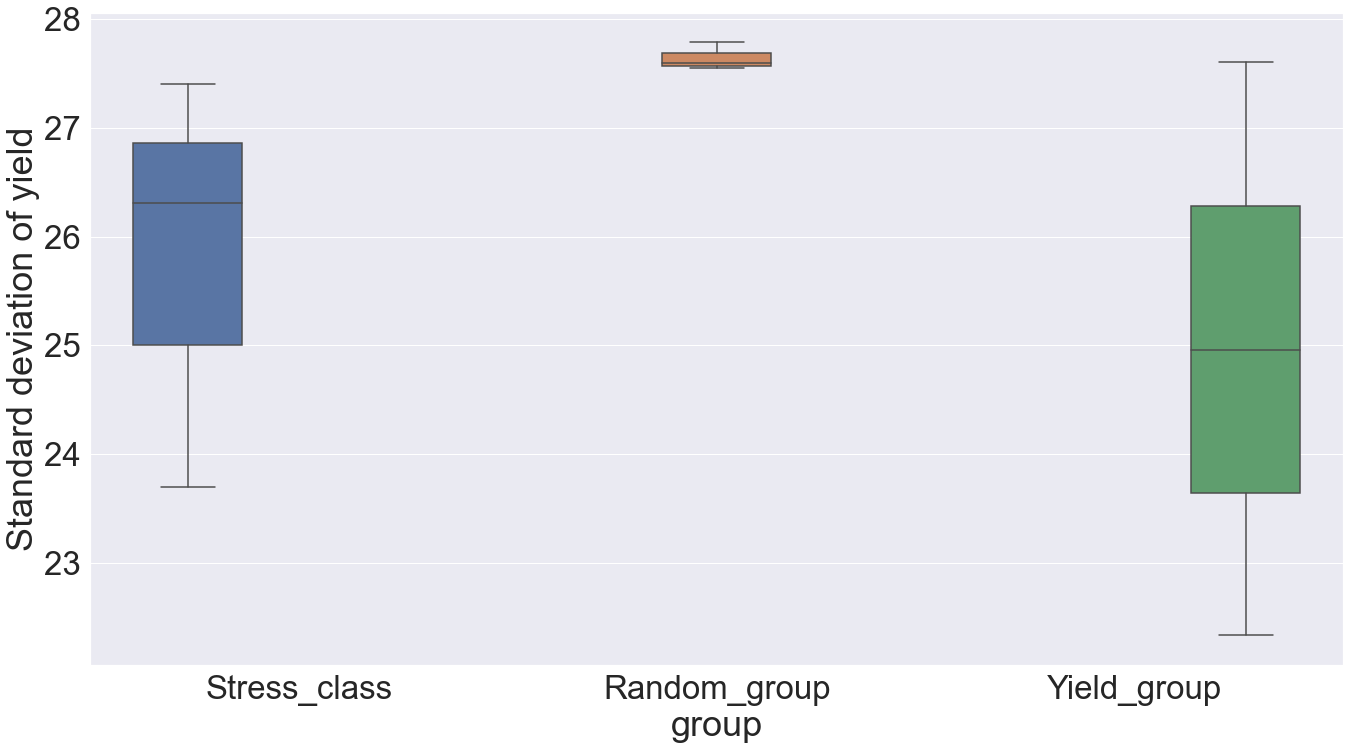

In [1547]:
plt.figure(figsize=(20,12))
sns.set(font_scale=3)
sns.boxplot(x=std_all2['group'],y=std_all2['ygsmn'],hue=std_all2['group'], showfliers = False)
#sns.violinplot(x=std_all['group'],y=std_all['ygsmn'],hue=std_all['group'], legend=False)
plt.legend([],[], frameon=False)
#plt.ylim(0,65)
plt.ylabel('Standard deviation of yield')

### On yield

#### Mean and standard deviation table by group

In [763]:
hd = lirr[['Heat_stress1','Drought_stress1','ygsmn']].groupby(['Heat_stress1','Drought_stress1']).agg(['mean','std','count'])
hd.sort_values([('ygsmn',  'mean')])

ygsmn                  
                                         mean        std  count
Heat_stress1     Drought_stress1                               
High_stress      High_stress        74.018845   4.499752     10
                 Very_high_stress  107.109425  34.456693    307
Medium_stress    Very_high_stress  110.072476  29.847065    118
                 High_stress       135.824662  44.392732   1048
Low_stress       Very_high_stress  137.804956  48.723897    259
                 High_stress       169.184934  41.374765   3062
Medium_stress    Low_stress        171.631787  18.045323    152
Very_high_stress Very_high_stress  178.723387  27.825216     44
Low_stress       Medium_stress     185.846419  34.155438   7176
                 Low_stress        187.315995  23.879732  34527

In [456]:
hd = lirr[['Heat_stress2','Drought_stress2','ygsmn']].groupby(['Heat_stress2','Drought_stress2']).agg(['mean','std','count'])
hd.sort_values([('ygsmn',  'mean')])

ygsmn                  
                                         mean        std  count
Heat_stress2     Drought_stress2                               
Very_high_stress Very_high_stress  115.152000  41.070346    358
High_stress      Very_high_stress  126.512142  44.010024    308
Low_stress       Very_high_stress  136.257143  41.196768    463
High_stress      High_stress       145.534996  46.668640   1553
                 Low_stress        153.590647  32.496650     35
                 Medium_stress     162.317953  27.798863    196
Medium_stress    High_stress       173.888258  25.811475    660
                 Medium_stress     182.535345  23.870422   5041
                 Low_stress        185.866032  22.575574  11888
Low_stress       High_stress       186.159527  35.555064   7273
                 Medium_stress     186.689982  28.228693   6788
                 Low_stress        189.914436  23.760370  12140

In [711]:
hd = lirr[['Heat_stress3','Drought_stress3','ygsmn']].groupby(['Heat_stress3','Drought_stress3']).agg(['mean','std','count'])
hd.sort_values([('ygsmn',  'mean')])

ygsmn                  
                                      mean        std  count
Heat_stress3  Drought_stress3                               
Low_stress    Very_high_stress  134.631887  38.783000    329
High_stress   High_stress       139.223030  46.266773     85
              Very_high_stress  144.667873  47.623053   2368
              Low_stress        161.595976  26.771998    229
              Medium_stress     161.755819  28.102522    256
Medium_stress Very_high_stress  163.245708  35.722652    327
              High_stress       164.503348  30.761574   1966
Low_stress    Medium_stress     183.212249  24.403663   6829
              High_stress       187.196012  37.586302   5911
              Low_stress        187.300438  22.390573  18911
Medium_stress Low_stress        191.019414  25.573776   5307
              Medium_stress     193.637875  24.233366   4185

In [167]:
lirr['Heat_stress1b'] = lirr['Heat_stress1']
lirr['Drought_stress1b'] = lirr['Drought_stress1']

lirr['Drought_stress1b'].loc[lirr.Drought_stress1b=='Low_stress']  = 'L'
lirr['Drought_stress1b'].loc[lirr.Drought_stress1b=='Medium_stress']  = 'M'
lirr['Drought_stress1b'].loc[lirr.Drought_stress1b=='High_stress']  = 'H'
lirr['Drought_stress1b'].loc[lirr.Drought_stress1b=='Very_high_stress']  = 'V'

lirr['Heat_stress1b'].loc[lirr.Heat_stress1b=='Low_stress']  = 'L'
lirr['Heat_stress1b'].loc[lirr.Heat_stress1b=='Medium_stress']  = 'M'
lirr['Heat_stress1b'].loc[lirr.Heat_stress1b=='High_stress']  = 'H'
lirr['Heat_stress1b'].loc[lirr.Heat_stress1b=='Very_high_stress']  = 'V'

lirr['Heat_Drought Stress1'] = lirr['Heat_stress1b'] +"_" + lirr['Drought_stress1b']
lirr.head(2)

<ipython-input-167-c7ac0612437b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lirr['Heat_stress1b'] = lirr['Heat_stress1']
<ipython-input-167-c7ac0612437b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lirr['Drought_stress1b'] = lirr['Drought_stress1']
<ipython-input-167-c7ac0612437b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [460]:
lirr['Heat_stress2b'] = lirr['Heat_stress2']
lirr['Drought_stress2b'] = lirr['Drought_stress2']

lirr['Drought_stress2b'].loc[lirr.Drought_stress2b=='Low_stress']  = 'L'
lirr['Drought_stress2b'].loc[lirr.Drought_stress2b=='Medium_stress']  = 'M'
lirr['Drought_stress2b'].loc[lirr.Drought_stress2b=='High_stress']  = 'H'
lirr['Drought_stress2b'].loc[lirr.Drought_stress2b=='Very_high_stress']  = 'V'

lirr['Heat_stress2b'].loc[lirr.Heat_stress2b=='Low_stress']  = 'L'
lirr['Heat_stress2b'].loc[lirr.Heat_stress2b=='Medium_stress']  = 'M'
lirr['Heat_stress2b'].loc[lirr.Heat_stress2b=='High_stress']  = 'H'
lirr['Heat_stress2b'].loc[lirr.Heat_stress2b=='Very_high_stress']  = 'V'

lirr['Heat_Drought Stress2'] = lirr['Heat_stress2b'] +"_" + lirr['Drought_stress2b']
lirr.head(2)

C:\Users\s1052014\Anaconda3\envs\py38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Unnamed: 0,trial_id,wsy_c,year,ygsmn,SandContent,SiltContent,ClayContent,pHwater,CationExchangeCapacity,...,Heat_Drought Stress,Level1_Level2,heat_cluster2,Heat_stress2,drought_cluster2,Drought_stress2,Heat_stress2b,Drought_stress2b,Heat_Drought Stress1,Heat_Drought Stress2
2,2,09SUABYG6615C02,LIRR,2009,218.353358,31.75,44.33,24.17,6.88,24.50,...,L_L,ET12_ET12a,0,Medium_stress,1,Medium_stress,M,M,L_L,M_M
6,6,09SUABYG6616312,LIRR,2009,212.386639,18.00,57.00,25.00,6.62,26.08,...,L_L,ET02_ET02a,0,Medium_stress,1,Medium_stress,M,M,L_L,M_M


In [713]:
lirr['Heat_stress3b'] = lirr['Heat_stress3']
lirr['Drought_stress3b'] = lirr['Drought_stress3']

lirr['Drought_stress3b'].loc[lirr.Drought_stress3b=='Low_stress']  = 'L'
lirr['Drought_stress3b'].loc[lirr.Drought_stress3b=='Medium_stress']  = 'M'
lirr['Drought_stress3b'].loc[lirr.Drought_stress3b=='High_stress']  = 'H'
lirr['Drought_stress3b'].loc[lirr.Drought_stress3b=='Very_high_stress']  = 'V'

lirr['Heat_stress3b'].loc[lirr.Heat_stress3b=='Low_stress']  = 'L'
lirr['Heat_stress3b'].loc[lirr.Heat_stress3b=='Medium_stress']  = 'M'
lirr['Heat_stress3b'].loc[lirr.Heat_stress3b=='High_stress']  = 'H'
lirr['Heat_stress3b'].loc[lirr.Heat_stress3b=='Very_high_stress']  = 'V'

lirr['Heat_Drought Stress3'] = lirr['Heat_stress3b'] +"_" + lirr['Drought_stress3b']

C:\Users\s1052014\Anaconda3\envs\py38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### CV

In [795]:
std_stress1= lirr[['ygsmn','Heat_Drought Stress1']].groupby(by=["Heat_Drought Stress1"]).apply(lambda x: np.std(x) / np.mean(x))
std_stress1 = std_stress1.reset_index()
std_stress1['group'] = 'Heat_drought1'
std_stress1.rename(columns={'Heat_Drought Stress1':'Category'},inplace=True)
std_stress1

std_stress2= lirr[['ygsmn','Heat_Drought Stress2']].groupby(by=["Heat_Drought Stress2"]).apply(lambda x: np.std(x) / np.mean(x))
std_stress2 = std_stress2.reset_index()
std_stress2['group'] = 'Heat_drought2'
std_stress2.rename(columns={'Heat_Drought Stress2':'Category'},inplace=True)

std_stress3= lirr[['ygsmn','Heat_Drought Stress3']].groupby(by=["Heat_Drought Stress3"]).apply(lambda x: np.std(x) / np.mean(x))
std_stress3 = std_stress3.reset_index()
std_stress3['group'] = 'Heat_drought3'
std_stress3.rename(columns={'Heat_Drought Stress3':'Category'},inplace=True)

std_et1= lirr[['EnvironmentType_level1','ygsmn']].groupby(by=["EnvironmentType_level1"]).apply(lambda x: np.std(x) / np.mean(x))
std_et1 = std_et1.reset_index()
std_et1['group'] = 'ET_level1'
std_et1.rename(columns={'EnvironmentType_level1':'Category'},inplace=True)

std_et2= lirr[['EnvironmentType_level2','ygsmn']].groupby(by=["EnvironmentType_level2"]).apply(lambda x: np.std(x) / np.mean(x))
std_et2 = std_et2.reset_index()
std_et2['group'] = 'ET_level2'
std_et2.rename(columns={'EnvironmentType_level2':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,13,size=lirr.shape[0])
#std_rd= lirr[['Random_group','ygsmn']].groupby(by=["Random_group"]).agg('std')
std_rd= lirr[['Random_group','ygsmn']].groupby(by=["Random_group"]).apply(lambda x: np.std(x) / np.mean(x))

#std_rd = std_rd.reset_index()
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)

std_all = pd.concat([std_stress1,std_stress2,std_stress3, std_et1, std_et2,std_rd])
std_all.shape

#### Mean

In [814]:
std_stress1= lirr[['ygsmn','Heat_Drought Stress1']].groupby(by=["Heat_Drought Stress1"]).agg('mean')
std_stress1 = std_stress1.reset_index()
std_stress1['group'] = 'Heat_drought1'
std_stress1.rename(columns={'Heat_Drought Stress1':'Category'},inplace=True)
std_stress1

std_stress2= lirr[['ygsmn','Heat_Drought Stress2']].groupby(by=["Heat_Drought Stress2"]).agg('mean')
std_stress2 = std_stress2.reset_index()
std_stress2['group'] = 'Heat_drought2'
std_stress2.rename(columns={'Heat_Drought Stress2':'Category'},inplace=True)

std_stress3= lirr[['ygsmn','Heat_Drought Stress3']].groupby(by=["Heat_Drought Stress3"]).agg('mean')
std_stress3 = std_stress3.reset_index()
std_stress3['group'] = 'Heat_drought3'
std_stress3.rename(columns={'Heat_Drought Stress3':'Category'},inplace=True)


std_et1= lirr[['EnvironmentType_level1','ygsmn']].groupby(by=["EnvironmentType_level1"]).agg('mean')
std_et1 = std_et1.reset_index()
std_et1['group'] = 'ET_level1'
std_et1.rename(columns={'EnvironmentType_level1':'Category'},inplace=True)

std_et2= lirr[['EnvironmentType_level2','ygsmn']].groupby(by=["EnvironmentType_level2"]).agg('mean')
std_et2 = std_et2.reset_index()
std_et2['group'] = 'ET_level2'
std_et2.rename(columns={'EnvironmentType_level2':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,13,size=lirr.shape[0])
#std_rd= lirr[['Random_group','ygsmn']].groupby(by=["Random_group"]).agg('mean''')
std_rd= lirr[['Random_group','ygsmn']].groupby(by=["Random_group"]).agg('mean')

#std_rd = std_rd.reset_index()
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)

std_all = pd.concat([std_stress1,std_stress2,std_stress3, std_et1, std_et2,std_rd])
std_all.shape

#### Standard deviation

In [122]:
std_stress2

,Category,ygsmn,group
0,H_H,46.668640,Heat_drought2
1,H_M,27.798863,Heat_drought2
2,H_V,44.010024,Heat_drought2
3,L_H,35.555064,Heat_drought2
4,L_M,28.228693,Heat_drought2
5,L_V,41.196768,Heat_drought2
6,M_H,25.811475,Heat_drought2
7,M_M,23.870422,Heat_drought2
8,V_V,41.070346,Heat_drought2


In [121]:
std_stress1= lirr[['ygsmn','Heat_Drought Stress1']].groupby(by=["Heat_Drought Stress1"]).agg('std')
std_stress1 = std_stress1.reset_index()
std_stress1['group'] = 'Heat_drought1'
std_stress1.rename(columns={'Heat_Drought Stress1':'Category'},inplace=True)
std_stress1

std_stress2= lirr[['ygsmn','Heat_Drought Stress2']].groupby(by=["Heat_Drought Stress2"]).agg('std')
std_stress2 = std_stress2.reset_index()
std_stress2['group'] = 'Heat_drought2'
std_stress2.rename(columns={'Heat_Drought Stress2':'Category'},inplace=True)

std_stress3= lirr[['ygsmn','Heat_Drought Stress3']].groupby(by=["Heat_Drought Stress3"]).agg('std')
std_stress3 = std_stress3.reset_index()
std_stress3['group'] = 'Heat_drought3'
std_stress3.rename(columns={'Heat_Drought Stress3':'Category'},inplace=True)


std_et1= lirr[['EnvironmentType_level1','ygsmn']].groupby(by=["EnvironmentType_level1"]).agg('std')
std_et1 = std_et1.reset_index()
std_et1['group'] = 'ET_level1'
std_et1.rename(columns={'EnvironmentType_level1':'Category'},inplace=True)

std_et2= lirr[['EnvironmentType_level2','ygsmn']].groupby(by=["EnvironmentType_level2"]).agg('std')
std_et2 = std_et2.reset_index()
std_et2['group'] = 'ET_level2'
std_et2.rename(columns={'EnvironmentType_level2':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,6,size=lirr.shape[0])
#std_rd= lirr[['Random_group','ygsmn']].groupby(by=["Random_group"]).agg('std''')
std_rd= lirr[['Random_group','ygsmn']].groupby(by=["Random_group"]).agg('std')
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)

std_yd= lirr[['Yield_group','ygsmn']].groupby(by=["Yield_group"]).agg('std')
std_yd = std_yd.reset_index()
std_yd['group'] = 'Yield_group'
std_yd.rename(columns={'Yield_group':'Category'},inplace=True)


std_all = pd.concat([std_stress1,std_stress2,std_stress3, std_et1, std_et2,std_rd, std_yd])
std_all.shape

(88, 3)

### Visualize VPD

In [75]:
std_stress1= lirr[['VPD2','Heat_Drought Stress1']].groupby(by=["Heat_Drought Stress1"]).agg('std')
std_stress1 = std_stress1.reset_index()
std_stress1['group'] = 'Heat_drought1'
std_stress1.rename(columns={'Heat_Drought Stress1':'Category'},inplace=True)
std_stress1

std_stress2= lirr[['VPD2','Heat_Drought Stress2']].groupby(by=["Heat_Drought Stress2"]).agg('std')
std_stress2 = std_stress2.reset_index()
std_stress2['group'] = 'Heat_drought2'
std_stress2.rename(columns={'Heat_Drought Stress2':'Category'},inplace=True)

std_stress3= lirr[['VPD2','Heat_Drought Stress3']].groupby(by=["Heat_Drought Stress3"]).agg('std')
std_stress3 = std_stress3.reset_index()
std_stress3['group'] = 'Heat_drought3'
std_stress3.rename(columns={'Heat_Drought Stress3':'Category'},inplace=True)


std_et1= lirr[['EnvironmentType_level1','VPD2']].groupby(by=["EnvironmentType_level1"]).agg('std')
std_et1 = std_et1.reset_index()
std_et1['group'] = 'ET_level1'
std_et1.rename(columns={'EnvironmentType_level1':'Category'},inplace=True)

std_et2= lirr[['EnvironmentType_level2','VPD2']].groupby(by=["EnvironmentType_level2"]).agg('std')
std_et2 = std_et2.reset_index()
std_et2['group'] = 'ET_level2'
std_et2.rename(columns={'EnvironmentType_level2':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,13,size=lirr.shape[0])
#std_rd= lirr[['Random_group','VPD2']].groupby(by=["Random_group"]).agg('std''')
std_rd= lirr[['Random_group','VPD2']].groupby(by=["Random_group"]).agg('std')
#std_rd = std_rd.reset_index()
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)


std_yd= lirr[['Yield_group','VPD2']].groupby(by=["Yield_group"]).agg('std')
std_yd = std_yd.reset_index()
std_yd['group'] = 'Yield_group'
std_yd.rename(columns={'Yield_group':'Category'},inplace=True)


std_all = pd.concat([std_stress1,std_stress2,std_stress3, std_et1, std_et2,std_rd, std_yd])
std_all.shape

(103, 3)

### Visualize drought stress variables 

#### Standard deviation

In [66]:
std_stress1= lirr[['Water_Deficit2','Heat_Drought Stress1']].groupby(by=["Heat_Drought Stress1"]).agg('std')
std_stress1 = std_stress1.reset_index()
std_stress1['group'] = 'Heat_drought1'
std_stress1.rename(columns={'Heat_Drought Stress1':'Category'},inplace=True)
std_stress1

std_stress2= lirr[['Water_Deficit2','Heat_Drought Stress2']].groupby(by=["Heat_Drought Stress2"]).agg('std')
std_stress2 = std_stress2.reset_index()
std_stress2['group'] = 'Heat_drought2'
std_stress2.rename(columns={'Heat_Drought Stress2':'Category'},inplace=True)

std_stress3= lirr[['Water_Deficit2','Heat_Drought Stress3']].groupby(by=["Heat_Drought Stress3"]).agg('std')
std_stress3 = std_stress3.reset_index()
std_stress3['group'] = 'Heat_drought3'
std_stress3.rename(columns={'Heat_Drought Stress3':'Category'},inplace=True)


std_et1= lirr[['EnvironmentType_level1','Water_Deficit2']].groupby(by=["EnvironmentType_level1"]).agg('std')
std_et1 = std_et1.reset_index()
std_et1['group'] = 'ET_level1'
std_et1.rename(columns={'EnvironmentType_level1':'Category'},inplace=True)

std_et2= lirr[['EnvironmentType_level2','Water_Deficit2']].groupby(by=["EnvironmentType_level2"]).agg('std')
std_et2 = std_et2.reset_index()
std_et2['group'] = 'ET_level2'
std_et2.rename(columns={'EnvironmentType_level2':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,13,size=lirr.shape[0])
#std_rd= lirr[['Random_group','Water_Deficit2']].groupby(by=["Random_group"]).agg('std''')
std_rd= lirr[['Random_group','Water_Deficit2']].groupby(by=["Random_group"]).agg('std')
#std_rd = std_rd.reset_index()
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)


std_yd= lirr[['Yield_group','Water_Deficit2']].groupby(by=["Yield_group"]).agg('std')
std_yd = std_yd.reset_index()
std_yd['group'] = 'Yield_group'
std_yd.rename(columns={'Yield_group':'Category'},inplace=True)


std_all = pd.concat([std_stress1,std_stress2,std_stress3, std_et1, std_et2,std_rd, std_yd])
std_all.shape


(103, 3)

#### Mean

In [819]:
std_stress1= lirr[['Water_Deficit2','Heat_Drought Stress1']].groupby(by=["Heat_Drought Stress1"]).agg('mean')
std_stress1 = std_stress1.reset_index()
std_stress1['group'] = 'Heat_drought1'
std_stress1.rename(columns={'Heat_Drought Stress1':'Category'},inplace=True)
std_stress1

std_stress2= lirr[['Water_Deficit2','Heat_Drought Stress2']].groupby(by=["Heat_Drought Stress2"]).agg('mean')
std_stress2 = std_stress2.reset_index()
std_stress2['group'] = 'Heat_drought2'
std_stress2.rename(columns={'Heat_Drought Stress2':'Category'},inplace=True)

std_stress3= lirr[['Water_Deficit2','Heat_Drought Stress3']].groupby(by=["Heat_Drought Stress3"]).agg('mean')
std_stress3 = std_stress3.reset_index()
std_stress3['group'] = 'Heat_drought3'
std_stress3.rename(columns={'Heat_Drought Stress3':'Category'},inplace=True)


std_et1= lirr[['EnvironmentType_level1','Water_Deficit2']].groupby(by=["EnvironmentType_level1"]).agg('mean')
std_et1 = std_et1.reset_index()
std_et1['group'] = 'ET_level1'
std_et1.rename(columns={'EnvironmentType_level1':'Category'},inplace=True)

std_et2= lirr[['EnvironmentType_level2','Water_Deficit2']].groupby(by=["EnvironmentType_level2"]).agg('mean')
std_et2 = std_et2.reset_index()
std_et2['group'] = 'ET_level2'
std_et2.rename(columns={'EnvironmentType_level2':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,13,size=lirr.shape[0])
#std_rd= lirr[['Random_group','Water_Deficit2']].groupby(by=["Random_group"]).agg('mean''')
std_rd= lirr[['Random_group','Water_Deficit2']].groupby(by=["Random_group"]).agg('mean')

#std_rd = std_rd.reset_index()
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)

std_all = pd.concat([std_stress1,std_stress2,std_stress3, std_et1, std_et2,std_rd])
std_all.shape

(91, 3)

#### CV

In [830]:
std_stress1= lirr[['Water_Deficit2','Heat_Drought Stress1']].groupby(by=["Heat_Drought Stress1"]).apply(lambda x: np.std(x) / np.mean(x))
std_stress1 = std_stress1.reset_index()
std_stress1['group'] = 'Heat_drought1'
std_stress1.rename(columns={'Heat_Drought Stress1':'Category'},inplace=True)
std_stress1

std_stress2= lirr[['Water_Deficit2','Heat_Drought Stress2']].groupby(by=["Heat_Drought Stress2"]).apply(lambda x: np.std(x) / np.mean(x))
std_stress2 = std_stress2.reset_index()
std_stress2['group'] = 'Heat_drought2'
std_stress2.rename(columns={'Heat_Drought Stress2':'Category'},inplace=True)

std_stress3= lirr[['Water_Deficit2','Heat_Drought Stress3']].groupby(by=["Heat_Drought Stress3"]).apply(lambda x: np.std(x) / np.mean(x))
std_stress3 = std_stress3.reset_index()
std_stress3['group'] = 'Heat_drought3'
std_stress3.rename(columns={'Heat_Drought Stress3':'Category'},inplace=True)

std_et1= lirr[['EnvironmentType_level1','Water_Deficit2']].groupby(by=["EnvironmentType_level1"]).apply(lambda x: np.std(x) / np.mean(x))
std_et1 = std_et1.reset_index()
std_et1['group'] = 'ET_level1'
std_et1.rename(columns={'EnvironmentType_level1':'Category'},inplace=True)

std_et2= lirr[['EnvironmentType_level2','Water_Deficit2']].groupby(by=["EnvironmentType_level2"]).apply(lambda x: np.std(x) / np.mean(x))
std_et2 = std_et2.reset_index()
std_et2['group'] = 'ET_level2'
std_et2.rename(columns={'EnvironmentType_level2':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,13,size=lirr.shape[0])
#std_rd= lirr[['Random_group','Water_Deficit2']].groupby(by=["Random_group"]).agg('std')
std_rd= lirr[['Random_group','Water_Deficit2']].groupby(by=["Random_group"]).apply(lambda x: np.std(x) / np.mean(x))

#std_rd = std_rd.reset_index()
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)

std_all = pd.concat([std_stress1,std_stress2,std_stress3, std_et1, std_et2,std_rd])
std_all.shape

(91, 3)

### Max T 

In [78]:
std_stress1= lirr[['Max_T2','Heat_Drought Stress1']].groupby(by=["Heat_Drought Stress1"]).agg('std')
std_stress1 = std_stress1.reset_index()
std_stress1['group'] = 'Heat_drought1'
std_stress1.rename(columns={'Heat_Drought Stress1':'Category'},inplace=True)
std_stress1

std_stress2= lirr[['Max_T2','Heat_Drought Stress2']].groupby(by=["Heat_Drought Stress2"]).agg('std')
std_stress2 = std_stress2.reset_index()
std_stress2['group'] = 'Heat_drought2'
std_stress2.rename(columns={'Heat_Drought Stress2':'Category'},inplace=True)

std_stress3= lirr[['Max_T2','Heat_Drought Stress3']].groupby(by=["Heat_Drought Stress3"]).agg('std')
std_stress3 = std_stress3.reset_index()
std_stress3['group'] = 'Heat_drought3'
std_stress3.rename(columns={'Heat_Drought Stress3':'Category'},inplace=True)


std_et1= lirr[['EnvironmentType_level1','Max_T2']].groupby(by=["EnvironmentType_level1"]).agg('std')
std_et1 = std_et1.reset_index()
std_et1['group'] = 'ET_level1'
std_et1.rename(columns={'EnvironmentType_level1':'Category'},inplace=True)

std_et2= lirr[['EnvironmentType_level2','Max_T2']].groupby(by=["EnvironmentType_level2"]).agg('std')
std_et2 = std_et2.reset_index()
std_et2['group'] = 'ET_level2'
std_et2.rename(columns={'EnvironmentType_level2':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,13,size=lirr.shape[0])
#std_rd= lirr[['Random_group','Max_T2']].groupby(by=["Random_group"]).agg('std''')
std_rd= lirr[['Random_group','Max_T2']].groupby(by=["Random_group"]).agg('std')
#std_rd = std_rd.reset_index()
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)


std_yd= lirr[['Yield_group','Max_T2']].groupby(by=["Yield_group"]).agg('std')
std_yd = std_yd.reset_index()
std_yd['group'] = 'Yield_group'
std_yd.rename(columns={'Yield_group':'Category'},inplace=True)


std_all = pd.concat([std_stress1,std_stress2,std_stress3, std_et1, std_et2,std_rd, std_yd])
std_all.shape

(103, 3)

### Heat 

#### Standard deviation

In [71]:
std_stress1= lirr[['Heat2','Heat_Drought Stress1']].groupby(by=["Heat_Drought Stress1"]).agg('std')
std_stress1 = std_stress1.reset_index()
std_stress1['group'] = 'Heat_drought1'
std_stress1.rename(columns={'Heat_Drought Stress1':'Category'},inplace=True)
std_stress1

std_stress2= lirr[['Heat2','Heat_Drought Stress2']].groupby(by=["Heat_Drought Stress2"]).agg('std')
std_stress2 = std_stress2.reset_index()
std_stress2['group'] = 'Heat_drought2'
std_stress2.rename(columns={'Heat_Drought Stress2':'Category'},inplace=True)

std_stress3= lirr[['Heat2','Heat_Drought Stress3']].groupby(by=["Heat_Drought Stress3"]).agg('std')
std_stress3 = std_stress3.reset_index()
std_stress3['group'] = 'Heat_drought3'
std_stress3.rename(columns={'Heat_Drought Stress3':'Category'},inplace=True)


std_et1= lirr[['EnvironmentType_level1','Heat2']].groupby(by=["EnvironmentType_level1"]).agg('std')
std_et1 = std_et1.reset_index()
std_et1['group'] = 'ET_level1'
std_et1.rename(columns={'EnvironmentType_level1':'Category'},inplace=True)

std_et2= lirr[['EnvironmentType_level2','Heat2']].groupby(by=["EnvironmentType_level2"]).agg('std')
std_et2 = std_et2.reset_index()
std_et2['group'] = 'ET_level2'
std_et2.rename(columns={'EnvironmentType_level2':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,13,size=lirr.shape[0])
#std_rd= lirr[['Random_group','Heat2']].groupby(by=["Random_group"]).agg('std''')
std_rd= lirr[['Random_group','Heat2']].groupby(by=["Random_group"]).agg('std')
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)

std_yd= lirr[['Yield_group','Heat2']].groupby(by=["Yield_group"]).agg('std')
std_yd = std_yd.reset_index()
std_yd['group'] = 'Yield_group'
std_yd.rename(columns={'Yield_group':'Category'},inplace=True)

std_all = pd.concat([std_stress1,std_stress2,std_stress3, std_et1, std_et2,std_rd, std_yd])
std_all.shape

(103, 3)

#### Mean

In [828]:
std_stress1= lirr[['Heat2','Heat_Drought Stress1']].groupby(by=["Heat_Drought Stress1"]).agg('mean')
std_stress1 = std_stress1.reset_index()
std_stress1['group'] = 'Heat_drought1'
std_stress1.rename(columns={'Heat_Drought Stress1':'Category'},inplace=True)
std_stress1

std_stress2= lirr[['Heat2','Heat_Drought Stress2']].groupby(by=["Heat_Drought Stress2"]).agg('mean')
std_stress2 = std_stress2.reset_index()
std_stress2['group'] = 'Heat_drought2'
std_stress2.rename(columns={'Heat_Drought Stress2':'Category'},inplace=True)

std_stress3= lirr[['Heat2','Heat_Drought Stress3']].groupby(by=["Heat_Drought Stress3"]).agg('mean')
std_stress3 = std_stress3.reset_index()
std_stress3['group'] = 'Heat_drought3'
std_stress3.rename(columns={'Heat_Drought Stress3':'Category'},inplace=True)


std_et1= lirr[['EnvironmentType_level1','Heat2']].groupby(by=["EnvironmentType_level1"]).agg('mean')
std_et1 = std_et1.reset_index()
std_et1['group'] = 'ET_level1'
std_et1.rename(columns={'EnvironmentType_level1':'Category'},inplace=True)

std_et2= lirr[['EnvironmentType_level2','Heat2']].groupby(by=["EnvironmentType_level2"]).agg('mean')
std_et2 = std_et2.reset_index()
std_et2['group'] = 'ET_level2'
std_et2.rename(columns={'EnvironmentType_level2':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,13,size=lirr.shape[0])
#std_rd= lirr[['Random_group','Heat2']].groupby(by=["Random_group"]).agg('mean''')
std_rd= lirr[['Random_group','Heat2']].groupby(by=["Random_group"]).agg('mean')

#std_rd = std_rd.reset_index()
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)

std_all = pd.concat([std_stress1,std_stress2,std_stress3, std_et1, std_et2,std_rd])
std_all.shape

(91, 3)

#### CV

In [832]:
std_stress1= lirr[['Heat2','Heat_Drought Stress1']].groupby(by=["Heat_Drought Stress1"]).apply(lambda x: np.std(x) / np.mean(x))
std_stress1 = std_stress1.reset_index()
std_stress1['group'] = 'Heat_drought1'
std_stress1.rename(columns={'Heat_Drought Stress1':'Category'},inplace=True)
std_stress1

std_stress2= lirr[['Heat2','Heat_Drought Stress2']].groupby(by=["Heat_Drought Stress2"]).apply(lambda x: np.std(x) / np.mean(x))
std_stress2 = std_stress2.reset_index()
std_stress2['group'] = 'Heat_drought2'
std_stress2.rename(columns={'Heat_Drought Stress2':'Category'},inplace=True)

std_stress3= lirr[['Heat2','Heat_Drought Stress3']].groupby(by=["Heat_Drought Stress3"]).apply(lambda x: np.std(x) / np.mean(x))
std_stress3 = std_stress3.reset_index()
std_stress3['group'] = 'Heat_drought3'
std_stress3.rename(columns={'Heat_Drought Stress3':'Category'},inplace=True)

std_et1= lirr[['EnvironmentType_level1','Heat2']].groupby(by=["EnvironmentType_level1"]).apply(lambda x: np.std(x) / np.mean(x))
std_et1 = std_et1.reset_index()
std_et1['group'] = 'ET_level1'
std_et1.rename(columns={'EnvironmentType_level1':'Category'},inplace=True)

std_et2= lirr[['EnvironmentType_level2','Heat2']].groupby(by=["EnvironmentType_level2"]).apply(lambda x: np.std(x) / np.mean(x))
std_et2 = std_et2.reset_index()
std_et2['group'] = 'ET_level2'
std_et2.rename(columns={'EnvironmentType_level2':'Category'},inplace=True)

lirr['Random_group'] = np.random.randint(1,13,size=lirr.shape[0])
#std_rd= lirr[['Random_group','Heat2']].groupby(by=["Random_group"]).agg('std')
std_rd= lirr[['Random_group','Heat2']].groupby(by=["Random_group"]).apply(lambda x: np.std(x) / np.mean(x))

#std_rd = std_rd.reset_index()
std_rd['group'] = 'Random_group'
std_rd.rename(columns={'Random_group':'Category'},inplace=True)

std_all = pd.concat([std_stress1,std_stress2,std_stress3, std_et1, std_et2,std_rd])
std_all.shape

(91, 3)

## Visualization 

### Standard deviation and cv plot

In [143]:
std_stress2

,Category,ygsmn,group
0,High_stress,39.953017,Heat_drought2
1,Low_stress,23.321321,Heat_drought2
2,Medium_stress,26.711497,Heat_drought2
3,Very_high_stress,42.847344,Heat_drought2


In [144]:
std_all = pd.concat([std_stress2,std_rd, std_yd])
std_all.shape

(11, 3)

Text(0, 0.5, 'Standard deviation of yield')

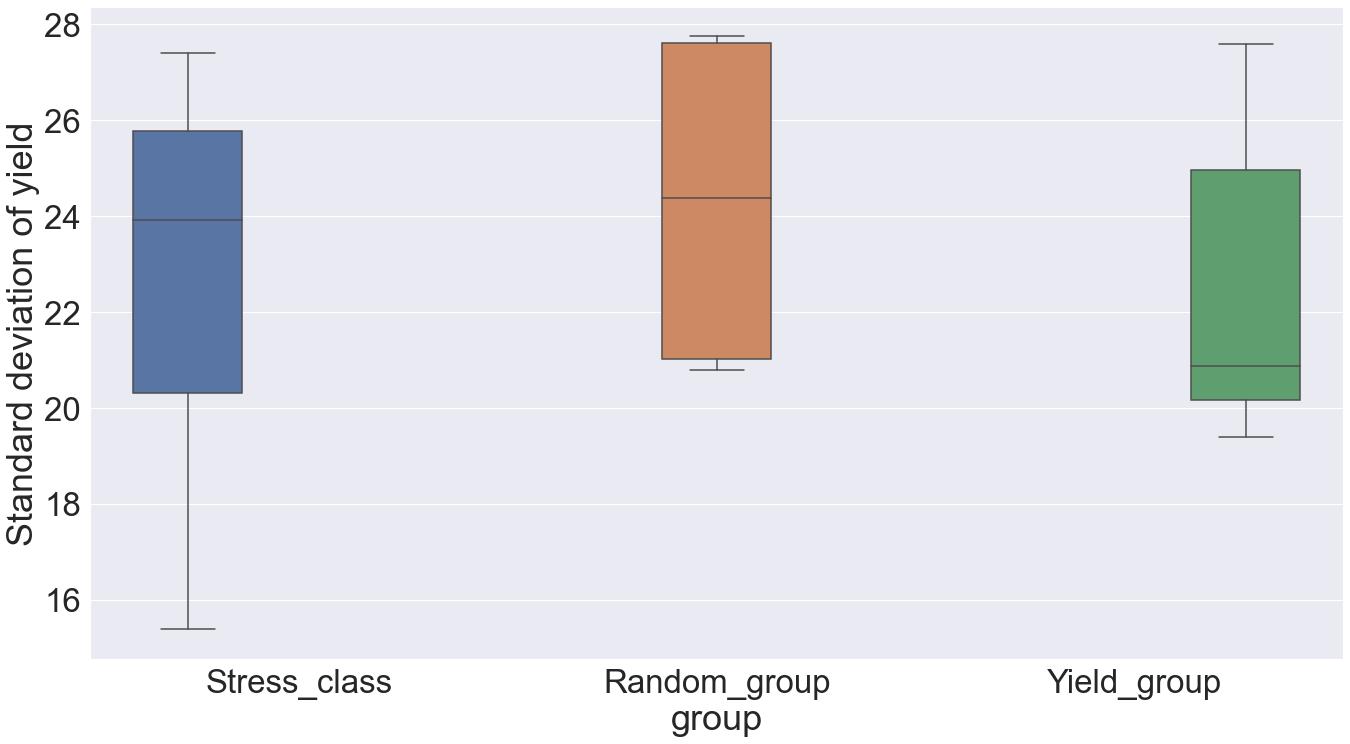

In [1533]:
plt.figure(figsize=(20,12))
sns.set(font_scale=3)
sns.boxplot(x=std_all['group'],y=std_all['ygsmn'],hue=std_all['group'], showfliers = False)
#sns.violinplot(x=std_all['group'],y=std_all['ygsmn'],hue=std_all['group'], legend=False)
plt.legend([],[], frameon=False)
#plt.ylim(0,65)
plt.ylabel('Standard deviation of yield')

### Yield by stress group plot

In [728]:
print(lirr['Heat_Drought Stress1'].nunique())
my_order = lirr.groupby(by=["Heat_Drought Stress1"])["ygsmn"].median().sort_values().index
my_order

10


Index(['H_H', 'H_V', 'M_V', 'M_H', 'L_V', 'L_H', 'M_L', 'V_V', 'L_L', 'L_M'], dtype='object', name='Heat_Drought Stress1')

In [729]:
#lirr.head(2)
#lirr.to_csv('Stress_characterization_results1.csv',index=False)

In [732]:
lirr.columns

Index(['Unnamed: 0', 'trial_id', 'wsy_c', 'year', 'ygsmn', 'SandContent',
       'SiltContent', 'ClayContent', 'pHwater', 'CationExchangeCapacity',
       'CoarseFragmentContent', 'CalciumCarbonateContent',
       'OrganicMatterContent', 'BulkDensity', 'RootDepthConstraint',
       'AvailableWaterAtFieldCapacity', 'HydraulicConductivityAtSaturation',
       'Texture', 'Thermal_Time1', 'Thermal_Time2', 'Water_Deficit1',
       'Water_Deficit2', 'Water_Logging1', 'Water_Logging2', 'Cold1', 'Cold2',
       'Heat1', 'Heat2', 'VPD1', 'VPD2', 'PTR1', 'PTR2', 'Min_T1', 'Min_T2',
       'Max_T1', 'Max_T2', 'Mean_T1', 'Mean_T2', 'Min_RelHumidity1',
       'Min_RelHumidity2', 'Max_RelHumidity1', 'Max_RelHumidity2',
       'Mean_RelHumidity1', 'Mean_RelHumidity2', 'Precip1', 'Precip2',
       'Radiation1', 'Radiation2', 'RefEvapotranspiration1',
       'RefEvapotranspiration2', 'Max_VPD1', 'Max_VPD2', 'WindSpeed1',
       'WindSpeed2', 'EnvironmentType_level1', 'EnvironmentType_level2',
       'd

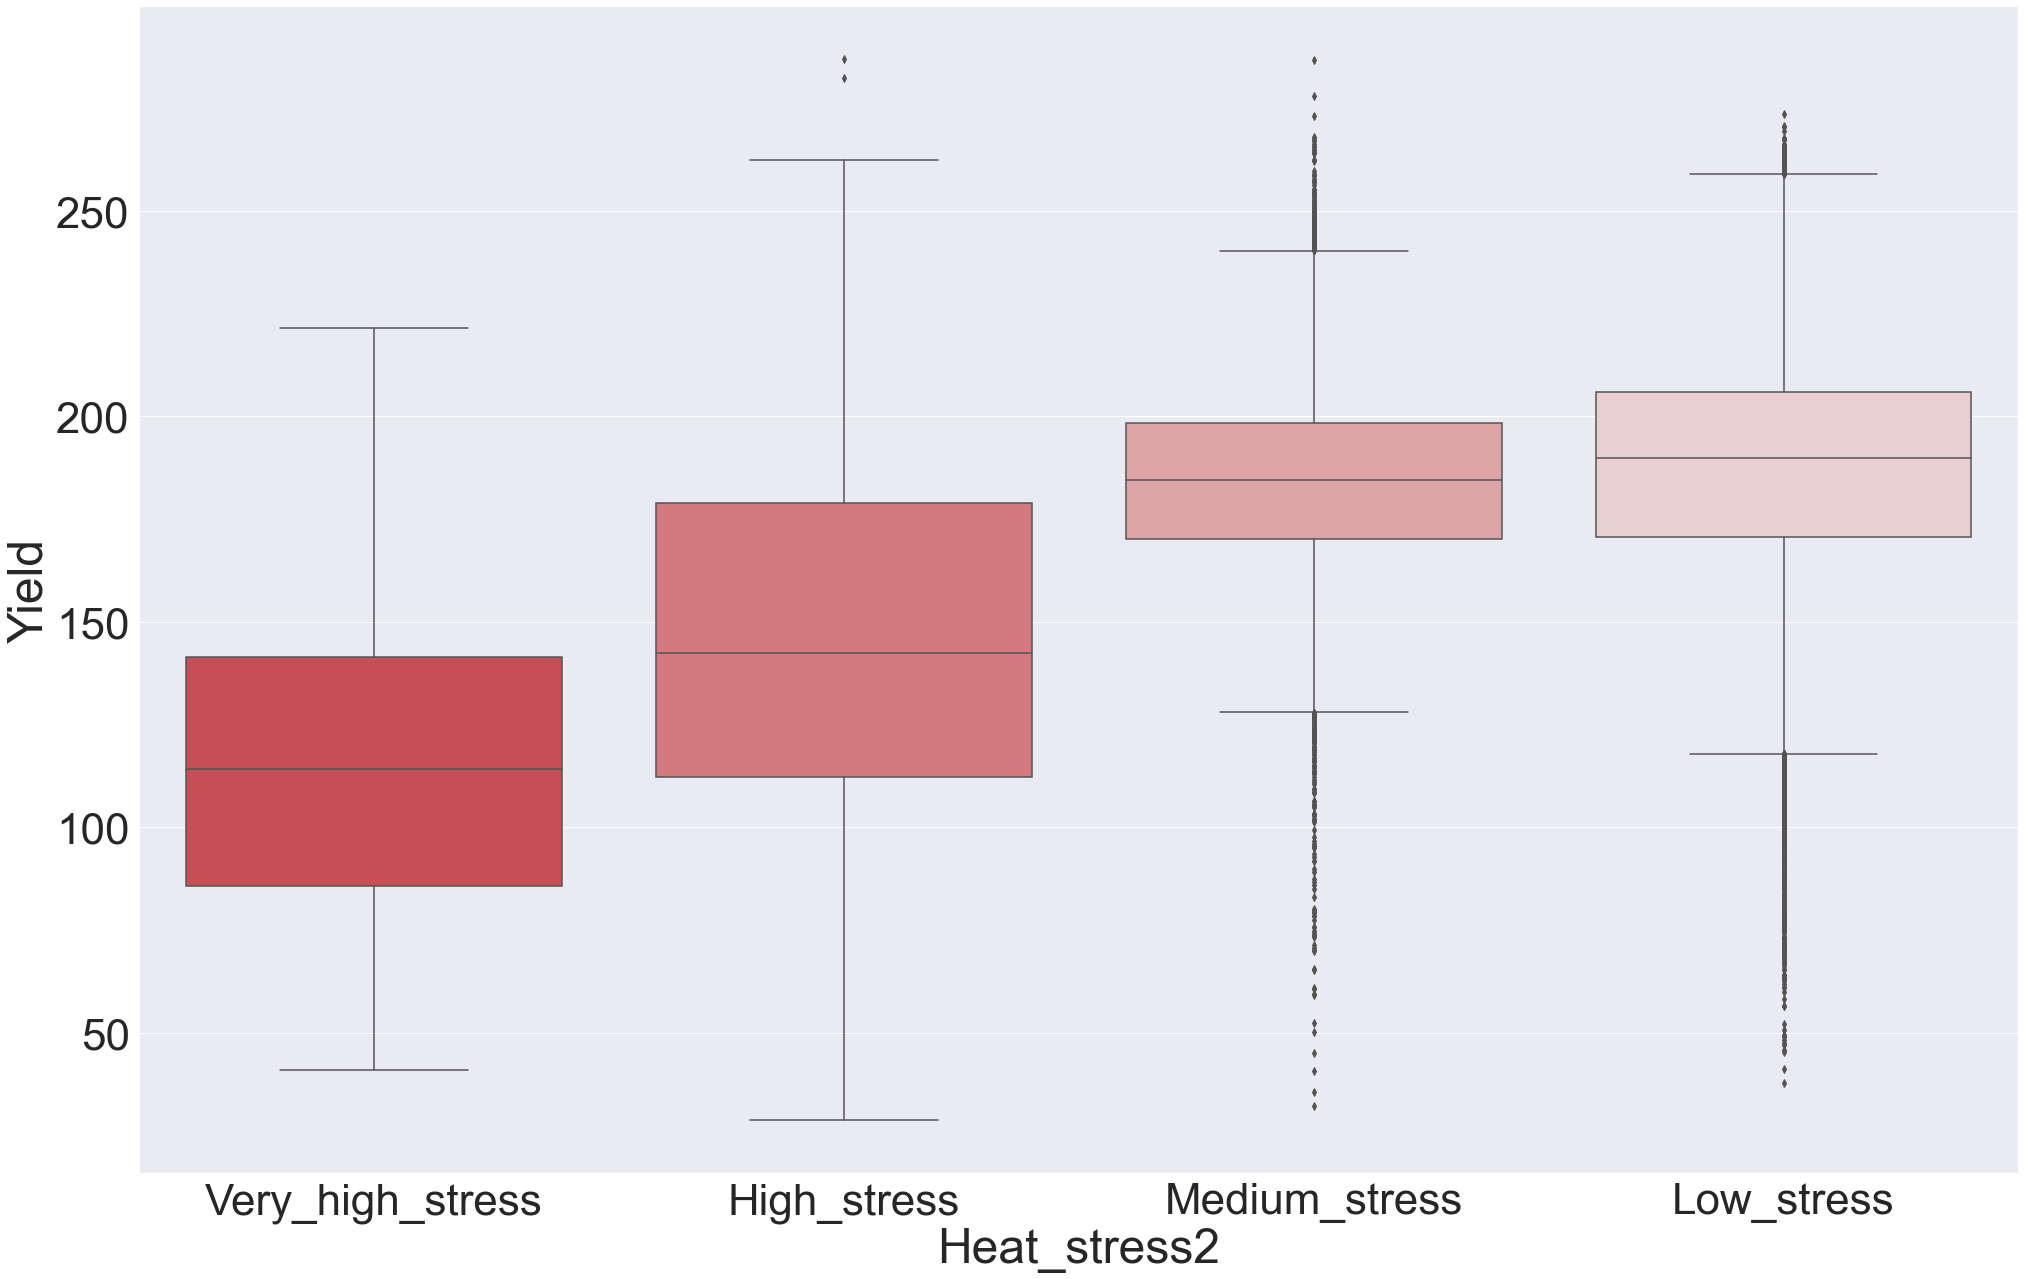

In [739]:
plt.figure(figsize=(30,20))
sns.set(font_scale=4)
my_order = lirr.groupby(by=["Heat_stress2"])["ygsmn"].median().sort_values().index
my_order
ax = sns.boxplot(x='Heat_stress2', y='ygsmn',data= lirr, order=my_order, palette=sns.diverging_palette(10, 220, sep=80, n=12))
plt.ylabel('Yield')
plt.show()

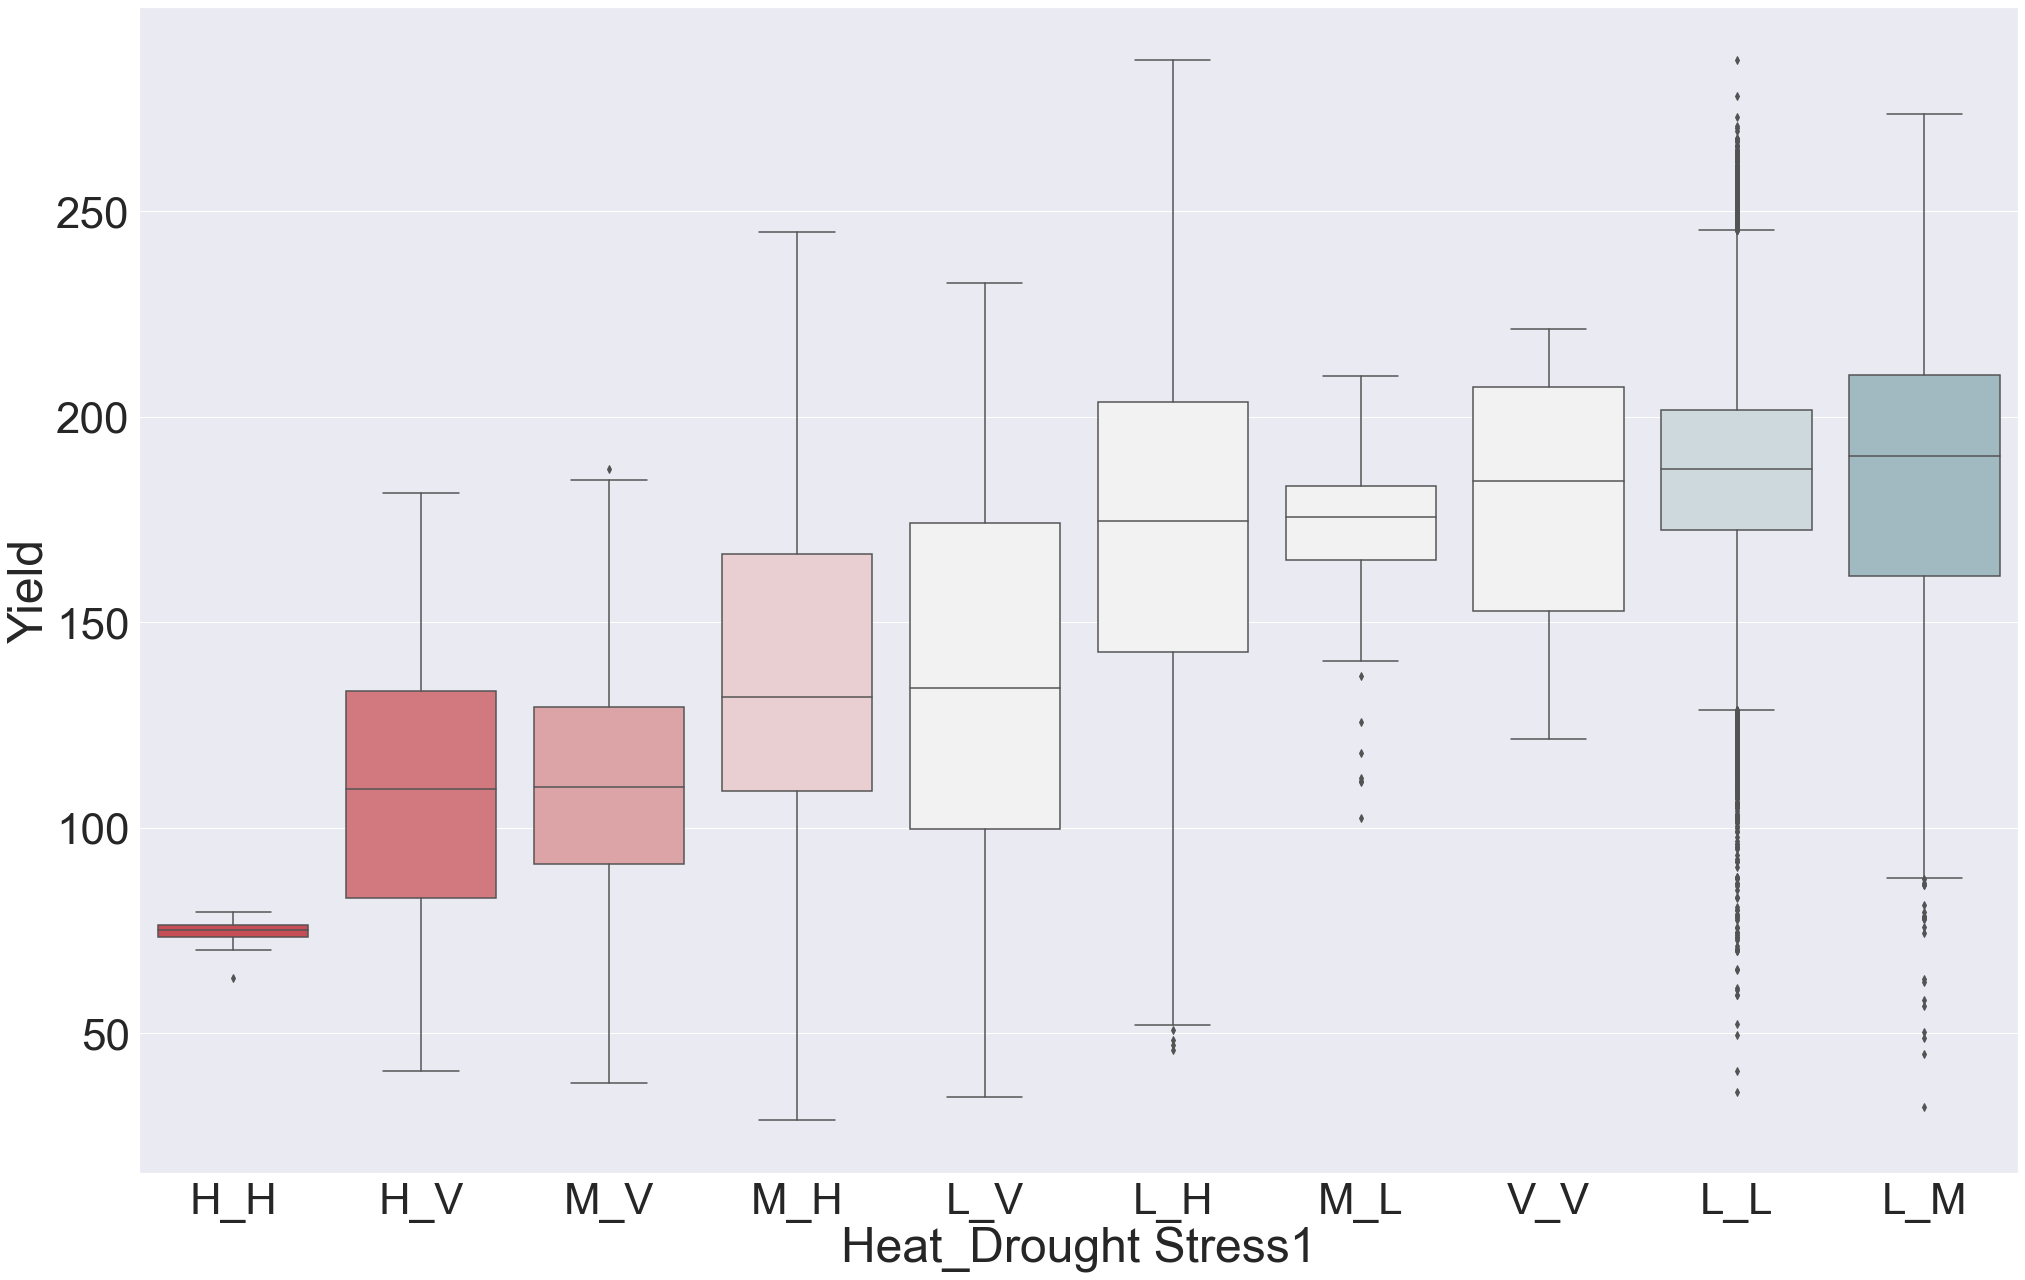

In [730]:
plt.figure(figsize=(30,20))
sns.set(font_scale=4)
ax = sns.boxplot(x='Heat_Drought Stress1', y='ygsmn',data= lirr, order=my_order, palette=sns.diverging_palette(10, 220, sep=80, n=12))
plt.ylabel('Yield')
plt.show()

In [172]:
lirr.columns

Index(['Unnamed: 0', 'trial_id', 'wsy_c', 'year', 'ygsmn', 'SandContent',
       'SiltContent', 'ClayContent', 'pHwater', 'CationExchangeCapacity',
       'CoarseFragmentContent', 'CalciumCarbonateContent',
       'OrganicMatterContent', 'BulkDensity', 'RootDepthConstraint',
       'AvailableWaterAtFieldCapacity', 'HydraulicConductivityAtSaturation',
       'Texture', 'Thermal_Time1', 'Thermal_Time2', 'Water_Deficit1',
       'Water_Deficit2', 'Water_Logging1', 'Water_Logging2', 'Cold1', 'Cold2',
       'Heat1', 'Heat2', 'VPD1', 'VPD2', 'PTR1', 'PTR2', 'Min_T1', 'Min_T2',
       'Max_T1', 'Max_T2', 'Mean_T1', 'Mean_T2', 'Min_RelHumidity1',
       'Min_RelHumidity2', 'Max_RelHumidity1', 'Max_RelHumidity2',
       'Mean_RelHumidity1', 'Mean_RelHumidity2', 'Precip1', 'Precip2',
       'Radiation1', 'Radiation2', 'RefEvapotranspiration1',
       'RefEvapotranspiration2', 'Max_VPD1', 'Max_VPD2', 'WindSpeed1',
       'WindSpeed2', 'EnvironmentType_level1', 'EnvironmentType_level2',
       'd

In [173]:
lirr['Level1_Level2'] = lirr['EnvironmentType_level1'] +"_" + lirr['EnvironmentType_level2']
lirr.head(2)

<ipython-input-173-e59b9b2bf1d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lirr['Level1_Level2'] = lirr['EnvironmentType_level1'] +"_" + lirr['EnvironmentType_level2']


,Unnamed: 0,trial_id,wsy_c,year,ygsmn,SandContent,SiltContent,ClayContent,pHwater,CationExchangeCapacity,...,EnvironmentType_level1,EnvironmentType_level2,drought_cluster1,Drought_stress1,heat_cluster,Heat_stress1,Heat_stress1b,Drought_stress1b,Heat_Drought Stress,Level1_Level2
2,2,09SUABYG6615C02,LIRR,2009,218.353358,31.75,44.33,24.17,6.88,24.50,...,ET12,ET12a,3,Low_stress,0,Low_stress,L,L,L_L,ET12_ET12a
6,6,09SUABYG6616312,LIRR,2009,212.386639,18.00,57.00,25.00,6.62,26.08,...,ET02,ET02a,3,Low_stress,0,Low_stress,L,L,L_L,ET02_ET02a


In [180]:
lirr['Level1_Level2'].unique()
my_order = lirr.groupby(by=["EnvironmentType_level2"])["ygsmn"].median().sort_values().index
my_order

Index(['ET15b', 'undefined', 'ET16b', 'ET16a', 'ET14b', 'ET11b', 'ET03b',
       'ET13b', 'ET07b', 'ET12b', 'ET12a', 'ET07a', 'ET11a', 'ET15a', 'ET06b',
       'ET05b', 'ET13a', 'ET08b', 'ET06a', 'ET09b', 'ET10a', 'ET08a', 'ET10b',
       'ET02b', 'ET05a', 'ET02a', 'ET04b', 'ET04a', 'ET03a'],
      dtype='object', name='EnvironmentType_level2')

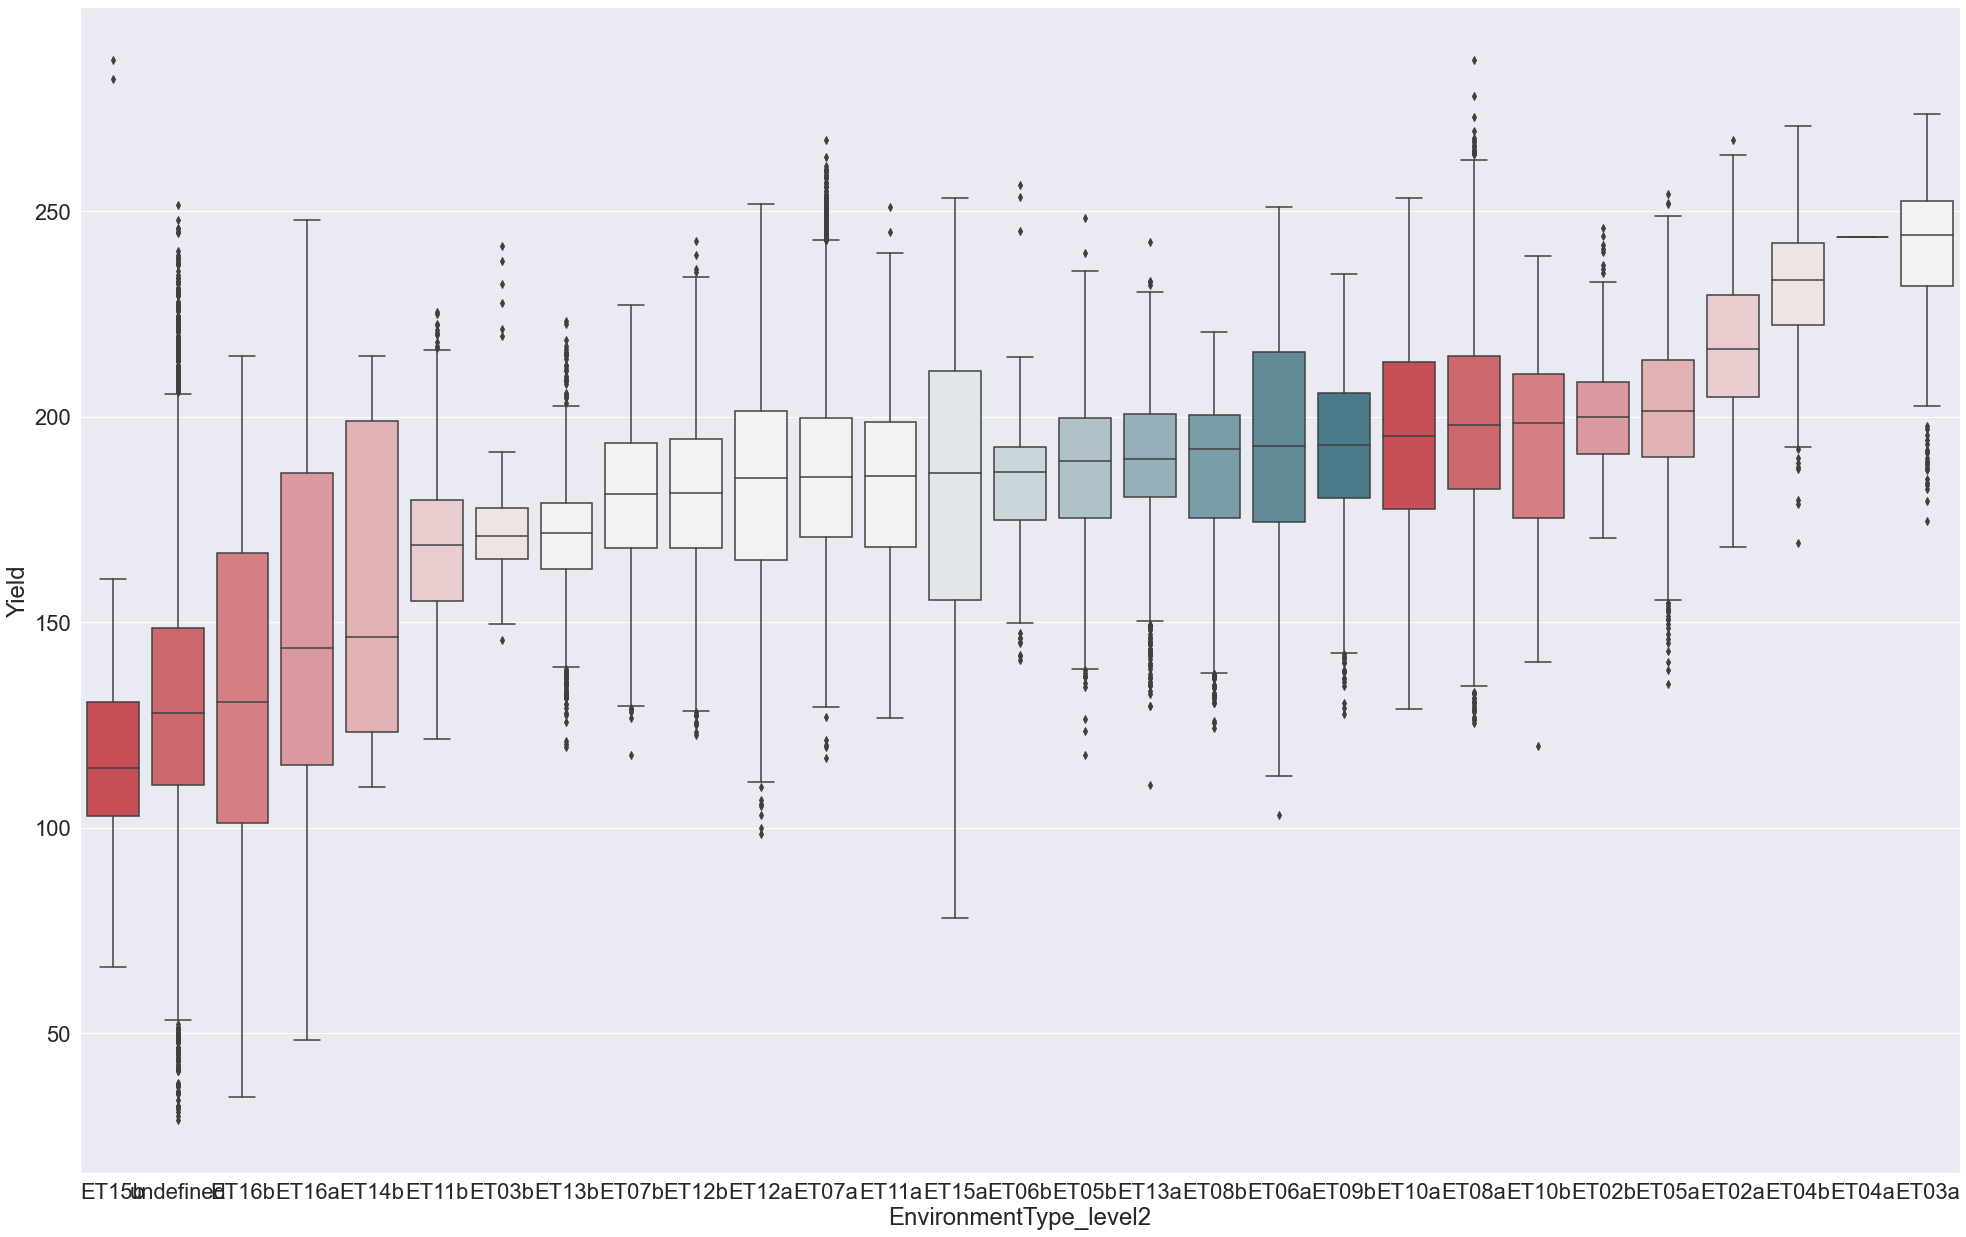

In [184]:
plt.figure(figsize=(30,20))
sns.set(font_scale=2)
ax = sns.boxplot(x='EnvironmentType_level2', y='ygsmn',data= lirr, order=my_order, palette=sns.diverging_palette(10, 220, sep=80, n=20))
plt.ylabel('Yield')
plt.show()

In [153]:
lirr.to_csv('LIRR_drought_stress2.csv',index=False)

In [ ]:
# 